In [1]:
import numpy as np
import pandas as pd
df = pd.read_stata('ccm.dta')
#df.head()  
pd.set_option('display.max_columns', None)
#print(df.columns)

## Selecting Firm types
- went with slightly bigger firms than originally expected
- wanted more data

In [2]:
# Filter Market Caps and companies that dont have gross profit
MiddleMarket_data = df[(df['mkvalt'] >= 0) & (df['mkvalt'] <= 12000)]
# Calculate market capitalization
MiddleMarket_data['Avg_Price'] = (MiddleMarket_data['prch_c'] + MiddleMarket_data['prcl_c']) / 2
MiddleMarket_data['Market_Cap'] = MiddleMarket_data['Avg_Price'] * MiddleMarket_data['csho']

/var/folders/_8/vpmh2zyd23z9mnscjwzk9t1r0000gn/T/ipykernel_45215/2959442128.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MiddleMarket_data['Avg_Price'] = (MiddleMarket_data['prch_c'] + MiddleMarket_data['prcl_c']) / 2
/var/folders/_8/vpmh2zyd23z9mnscjwzk9t1r0000gn/T/ipykernel_45215/2959442128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MiddleMarket_data['Avg_Price'] = (MiddleMarket_data['prch_c'] + MiddleMarket_data['prcl_c']) / 2
/var/folders/_8/vpmh2zyd23z9mnscjwzk9t1r0000gn/T/ipykernel_45215/29594421

## Renaming/Reorganizing downloaded data

In [3]:
#(MiddleMarket_data['ebitda'] > 1).sum()
#filtered_data = MiddleMarket_data[MiddleMarket_data['ebitda'] > 1]
#filtered_data['ebitda']
filtered_data = MiddleMarket_data.loc[MiddleMarket_data['ebitda'] > 0, ['tic','ebitda','dvc','ob','conm','fdate','lt','fyr','xrd','cogs','oibdp','capx','at','revt', 'xsga','ppent','csho','ppegt', 'che','ceq','lct','prcl_c','prch_c','Avg_Price','Market_Cap','oiadp','invt','sich','emp','txt','xint','act']]
#filtered_data
filtered_data.columns = ['Ticker', 'EBITDA', 'Dividends', 'Operating Income', 'Company Name', 'Fiscal Date', 'Long-Term Debt', 'Fiscal Year', 'Research and Development Expenses', 'Cost of Goods Sold', 'Operating Income Before Depreciation', 'Capital Expenditures', 'Total Assets', 'Revenue', 'Selling, General, and Administrative Expenses', 'Property, Plant, and Equipment Net', 'Common Shares Outstanding', 'Gross Property, Plant, and Equipment', 'Cash and Equivalents', 'Common Equity', 'Current Liabilities', '52-Week Low Price', '52-Week High Price','Avg_Price','Market_Cap','OpInc After Dep','Inventory','SP Index Code','Employees','Taxes','Interest Expense','Current Assets']
filtered_data.reindex()


Ticker    EBITDA  Dividends  Operating Income  \
0        AIR   101.800      0.100             750.0   
1        AIR   149.300      0.000             850.0   
2        AIR   179.300      0.000             740.0   
5        AAL  4103.000      0.000               NaN   
6        AAL  6267.000      0.000               NaN   
...      ...       ...        ...               ...   
21958   HYFM    36.742      0.000               NaN   
21968   KARO    84.155      0.000               NaN   
21969   KARO    81.977     15.995               NaN   
21976   HSHP    23.744      0.000               NaN   
21985   CLCO   277.522     87.511               NaN   

                      Company Name Fiscal Date  Long-Term Debt  Fiscal Year  \
0                         AAR CORP  2021-07-22         565.300            5   
1                         AAR CORP  2022-07-22         539.400            5   
2                         AAR CORP  2023-07-21         734.000            5   
5      AMERICAN AIRLINES GROUP INC  2023-02-26       70515.000           12   
6      AMERICAN AIRLINES GROUP INC  2024-02-23       68260.000           12   
...                            ...         ...             ...          ...   
21958       HYDROFARM HLDNG GP INC  2022-03-31         256.062           12   
21968                 KAROOOOO LTD  2022-06-20          59.330            2   
21969                 KAROOOOO LTD  2023-06-21          57.738            2   
21976        HIMALAYA SHIPPING LTD  2024-04-12         445.001           12   
21985             COOL COMPANY LTD  2024-03-28        1250.363           12   

       Research and Development Expenses  Cost of Goods Sold  \
0                                    NaN            1364.600   
1                                    NaN            1470.300   
2                                    NaN            1591.300   
5                                    NaN           37631.000   
6                                    NaN           38716.000   
...                                  ...                 ...   
21958                                NaN             374.733   
21968                              9.673              27.559   
21969                              9.645              37.580   
21976                                NaN               9.146   
21985                                NaN              77.315   

       Operating Income Before Depreciation  Capital Expenditures  \
0                                   101.800                11.300   
1                                   149.300                17.300   
2                                   179.300                29.500   
5                                  4103.000              2906.000   
6                                  6267.000              2596.000   
...                                     ...                   ...   
21958                                36.742                 5.402   
21968                                84.155                35.818   
21969                                81.977                31.582   
21976                                23.744               413.055   
21985                               277.522               195.088   

       Total Assets    Revenue  Selling, General, and Administrative Expenses  \
0          1539.700   1651.400                                        185.000   
1          1573.900   1817.100                                        197.500   
2          1833.100   1990.600                                        220.000   
5         64716.000  48971.000                                       7237.000   
6         63058.000  52788.000                                       7805.000   
...             ...        ...                                            ...   
21958       891.242    479.420                                         67.945   
21968       200.247    177.987                                         66.273   
21969       204.404    191.082                                       

## Selecting Varriables/Financial metrics of Interest

In [4]:
# Reorder the columns
filtered_data = filtered_data[['Ticker', 'Company Name', 'Market_Cap','Fiscal Date', 'Fiscal Year','Employees','SP Index Code', 
                               'EBITDA', 'Operating Income', 'Dividends', 
                               'Long-Term Debt', 'Research and Development Expenses', 
                               'Cost of Goods Sold', 'Operating Income Before Depreciation', 
                               'Capital Expenditures', 'Total Assets', 'Revenue', 
                               'Selling, General, and Administrative Expenses', 
                               'Property, Plant, and Equipment Net', 
                               'Gross Property, Plant, and Equipment', 'Cash and Equivalents', 
                               'Common Equity', 'Current Liabilities', 'Common Shares Outstanding', 
                               '52-Week Low Price', '52-Week High Price', 'Avg_Price', 
                                'Inventory', 'OpInc After Dep','Interest Expense','Taxes', 'Current Assets']]

# Display the reordered DataFrame
filtered_data = filtered_data[(filtered_data['Operating Income'] >= .00)]
filtered_data.replace([np.inf, -np.inf], np.nan, inplace=True)
filtered_data.fillna(0, inplace=True)
filtered_data = filtered_data[(filtered_data['Market_Cap'] >= 100)]
filtered_data.describe()


/var/folders/_8/vpmh2zyd23z9mnscjwzk9t1r0000gn/T/ipykernel_45215/362217121.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  filtered_data.fillna(0, inplace=True)


Market_Cap  Fiscal Year    Employees  SP Index Code       EBITDA  \
count   1865.000000  1865.000000  1865.000000    1865.000000  1865.000000   
mean    2565.155154     9.635925    12.313823    4672.390885   345.178820   
std     2717.436271     3.803079    23.895366    2077.657616   520.606361   
min      101.146145     1.000000     0.000000       0.000000     0.188000   
25%      567.022015     9.000000     1.767000    3530.000000    62.692000   
50%     1467.084995    12.000000     4.850000    3845.000000   178.222000   
75%     3671.073840    12.000000    13.000000    5900.000000   442.800000   
max    16531.765360    12.000000   300.000000    9997.000000  7101.000000   

       Operating Income    Dividends  Long-Term Debt  \
count       1865.000000  1865.000000     1865.000000   
mean        1477.291645    28.439949     2500.088561   
std         4531.653675   115.608116     7288.660880   
min            0.000000    -1.000000        0.000000   
25%            0.000000     0.000000      372.338000   
50%          117.873000     0.000000     1007.659000   
75%          904.600000    25.241000     2461.595000   
max        48600.000000  4207.700000   182626.000000   

       Research and Development Expenses  Cost of Goods Sold  \
count                        1865.000000         1865.000000   
mean                           28.863912         2378.094880   
std                            88.376601         4699.410975   
min                             0.000000            4.088000   
25%                             0.000000          355.933000   
50%                             0.000000          910.268000   
75%                            16.500000         2360.575000   
max                          1144.400000        55731.400000   

       Operating Income Before Depreciation  Capital Expenditures  \
count                           1865.000000           1865.000000   
mean                             345.178820             99.539855   
std                              520.606361            209.489278   
min                                0.188000              0.000000   
25%                               62.692000             12.632000   
50%                              178.222000             37.079000   
75%                              442.800000            101.910000   
max                             7101.000000           3532.000000   

        Total Assets       Revenue  \
count    1865.000000   1865.000000   
mean     3595.068219   3230.708273   
std      8327.620485   5782.312996   
min        20.175000     13.895000   
25%       729.140000    589.837000   
50%      1755.084000   1460.860000   
75%      3864.920000   3369.810000   
max    196392.000000  77649.700000   

       Selling, General, and Administrative Expenses  \
count                                    1865.000000   
mean                                      507.434573   
std                                       980.975527   
min                                         0.000000   
25%                                       104.000000   
50%                                       226.903000   
75%                                       512.817000   
max                                     17903.300000   

       Property, Plant, and Equipment Net  \
count                         1865.000000   
mean                           932.470596   
std                           1849.034995   
min                              0.000000   
25%                            110.875000   
50%                            306.543000   
75%                            910.730000   
max                          17667.000000   

       Gross Property, Plant, and Equipment  Cash and Equivalents  \
count                           1865.000000           1865.000000   
mean                            1587.643820            312.607887   
std                             2875.506466            558.295577   
min                                0.000000              0.043000   
25%         

## Calculating mutliples and metrics (features/targets)

In [5]:
# EV/EBITDA
filtered_data['Enterprise_Value'] = filtered_data['Market_Cap'] + filtered_data['Long-Term Debt'] - filtered_data['Cash and Equivalents']
filtered_data['EV/EBITDA'] = filtered_data['Enterprise_Value'] / filtered_data['EBITDA']
filtered_data['EV/Sales'] = filtered_data['Enterprise_Value'] / filtered_data['Revenue']
# P/E Ratio
filtered_data['EPS'] = filtered_data['Operating Income Before Depreciation'] / filtered_data['Common Shares Outstanding']
filtered_data['P/E'] = filtered_data['Avg_Price'] / filtered_data['EPS']
# Debt-to-Equity Ratio
filtered_data['Debt_to_Equity'] = filtered_data['Long-Term Debt'] / filtered_data['Common Equity']
# Return on Equity (ROE)
filtered_data['ROE'] = filtered_data['Operating Income Before Depreciation'] / filtered_data['Common Equity']
# Current Ratio
filtered_data['Current_Ratio'] = filtered_data['Total Assets'] / filtered_data['Current Liabilities']
# Quick Ratio
filtered_data['Quick_Ratio'] = (filtered_data['Total Assets'] - filtered_data['Inventory']) / filtered_data['Current Liabilities']
# Interest Covered Ratio
filtered_data['Interest_Coverage_Ratio'] = filtered_data['EBITDA'] / filtered_data['Interest Expense']
# Gross Margin
filtered_data['Gross_Margin'] = (filtered_data['Revenue'] - filtered_data['Cost of Goods Sold']) / filtered_data['Revenue']
# Operating Margin
filtered_data['Operating_Margin'] = filtered_data['Operating Income Before Depreciation'] / filtered_data['Revenue']
# Calculate Gross Profit
filtered_data['Gross Profit'] = filtered_data['Revenue'] - filtered_data['Cost of Goods Sold']
# Calculate Gross Profit Margin
filtered_data['Gross Profit Margin'] = (filtered_data['Gross Profit'] / filtered_data['Revenue']) 
#EV/GP 
filtered_data['EV/GP'] = filtered_data['Enterprise_Value'] / filtered_data['Gross Profit']
# Calculate EBITDA - Capex
filtered_data['EBITDA - Capex'] = filtered_data['EBITDA'] - filtered_data['Capital Expenditures']
# Calculate EBITDA - Capex margin
filtered_data['EBITDA - Capex Margin'] = (filtered_data['EBITDA - Capex'] / filtered_data['EBITDA']) 
filtered_data['EV/EBITDA-Capex'] = filtered_data['Enterprise_Value'] / filtered_data['EBITDA - Capex']
filtered_data['Free Cash Flow'] = (filtered_data['EBITDA']
                                   - filtered_data['Taxes']
                                   - filtered_data['Interest Expense']
                                   + (filtered_data['Current Assets'] - filtered_data['Current Liabilities'])
                                   - filtered_data['Capital Expenditures'])
filtered_data['FCF_Positive'] = (filtered_data['Free Cash Flow'] > 0).astype(int)
filtered_data['FCF Yield'] = filtered_data['Free Cash Flow'] / filtered_data['Market_Cap']
filtered_data['Invested_Capital'] = filtered_data['Long-Term Debt'] + filtered_data['Common Equity']
filtered_data['EBIT'] = filtered_data['Operating Income'] + filtered_data['Interest Expense'] + filtered_data['Taxes']
filtered_data['EV_EBIT'] = filtered_data['Enterprise_Value'] / filtered_data['EBIT']
filtered_data['ROIC'] = filtered_data['EBIT'] / filtered_data['Invested_Capital']
filtered_data['EBIT Margin (%)'] = (filtered_data['EBIT'] / filtered_data['Revenue']) 
filtered_data['EBIT_Positive'] = (filtered_data['EBIT'] > 0).astype(int)
filtered_data

filtered_data['Revenue per Employee'] = filtered_data['Revenue'] / filtered_data['Employees']

filtered_data['Total Debt Service'] = filtered_data['Long-Term Debt'] + filtered_data['Interest Expense']
filtered_data['Debt_Coverage_Ratio'] = filtered_data['Operating Income Before Depreciation'] / filtered_data['Total Debt Service']

filtered_data['Dividend (y/n)'] = (filtered_data['Dividends'] > 0).astype(int)

filtered_data['Price_Range_Ratio'] = (filtered_data['52-Week High Price'] - filtered_data['52-Week Low Price']) / filtered_data['52-Week Low Price']

filtered_data.describe()

Market_Cap  Fiscal Year    Employees  SP Index Code       EBITDA  \
count   1865.000000  1865.000000  1865.000000    1865.000000  1865.000000   
mean    2565.155154     9.635925    12.313823    4672.390885   345.178820   
std     2717.436271     3.803079    23.895366    2077.657616   520.606361   
min      101.146145     1.000000     0.000000       0.000000     0.188000   
25%      567.022015     9.000000     1.767000    3530.000000    62.692000   
50%     1467.084995    12.000000     4.850000    3845.000000   178.222000   
75%     3671.073840    12.000000    13.000000    5900.000000   442.800000   
max    16531.765360    12.000000   300.000000    9997.000000  7101.000000   

       Operating Income    Dividends  Long-Term Debt  \
count       1865.000000  1865.000000     1865.000000   
mean        1477.291645    28.439949     2500.088561   
std         4531.653675   115.608116     7288.660880   
min            0.000000    -1.000000        0.000000   
25%            0.000000     0.000000      372.338000   
50%          117.873000     0.000000     1007.659000   
75%          904.600000    25.241000     2461.595000   
max        48600.000000  4207.700000   182626.000000   

       Research and Development Expenses  Cost of Goods Sold  \
count                        1865.000000         1865.000000   
mean                           28.863912         2378.094880   
std                            88.376601         4699.410975   
min                             0.000000            4.088000   
25%                             0.000000          355.933000   
50%                             0.000000          910.268000   
75%                            16.500000         2360.575000   
max                          1144.400000        55731.400000   

       Operating Income Before Depreciation  Capital Expenditures  \
count                           1865.000000           1865.000000   
mean                             345.178820             99.539855   
std                              520.606361            209.489278   
min                                0.188000              0.000000   
25%                               62.692000             12.632000   
50%                              178.222000             37.079000   
75%                              442.800000            101.910000   
max                             7101.000000           3532.000000   

        Total Assets       Revenue  \
count    1865.000000   1865.000000   
mean     3595.068219   3230.708273   
std      8327.620485   5782.312996   
min        20.175000     13.895000   
25%       729.140000    589.837000   
50%      1755.084000   1460.860000   
75%      3864.920000   3369.810000   
max    196392.000000  77649.700000   

       Selling, General, and Administrative Expenses  \
count                                    1865.000000   
mean                                      507.434573   
std                                       980.975527   
min                                         0.000000   
25%                                       104.000000   
50%                                       226.903000   
75%                                       512.817000   
max                                     17903.300000   

       Property, Plant, and Equipment Net  \
count                         1865.000000   
mean                           932.470596   
std                           1849.034995   
min                              0.000000   
25%                            110.875000   
50%                            306.543000   
75%                            910.730000   
max                          17667.000000   

       Gross Property, Plant, and Equipment  Cash and Equivalents  \
count                           1865.000000           1865.000000   
mean                            1587.643820            312.607887   
std                             2875.506466            558.295577   
min                                0.000000              0.043000   
25%         

## Derriving Marginal Effects

In [6]:
# Group the data by "Ticker" and sort by "Fiscal Year"
grouped_data = filtered_data.sort_values(by=['Ticker', 'Fiscal Year']).groupby('Ticker')

# Calculate year-over-year changes in margins
filtered_data['YOY_Gross_Margin_Change'] = grouped_data['Gross_Margin'].pct_change()
filtered_data['YOY_EBIT_Margin_Change'] = grouped_data['EBIT Margin (%)'].pct_change()
filtered_data['YOY_Operating_Margin_Change'] = grouped_data['Operating_Margin'].pct_change()
filtered_data['YOY_Gross_Profit_Change'] = grouped_data['Gross Profit'].pct_change()
filtered_data['YOY_Revenue_Change'] = grouped_data['Revenue'].pct_change()
filtered_data['YOY_EBIT_Change'] = grouped_data['EBIT'].pct_change()
filtered_data

Ticker             Company Name   Market_Cap          Fiscal Date  \
0        AIR                 AAR CORP  1000.228125  2021-07-22 00:00:00   
1        AIR                 AAR CORP  1351.759245  2022-07-22 00:00:00   
2        AIR                 AAR CORP  1511.513640  2023-07-21 00:00:00   
7       CECO  CECO ENVIRONMENTAL CORP   221.591938  2021-04-01 00:00:00   
8       CECO  CECO ENVIRONMENTAL CORP   266.913360  2022-04-10 00:00:00   
...      ...                      ...          ...                  ...   
21898    NVT       NVENT ELECTRIC PLC  8013.274605  2024-03-04 00:00:00   
21909    ACA               ARCOSA INC  2058.140000  2021-03-06 00:00:00   
21910    ACA               ARCOSA INC  2804.056500  2022-03-11 00:00:00   
21911    ACA               ARCOSA INC  2643.124000  2023-03-06 00:00:00   
21912    ACA               ARCOSA INC  3310.875000  2024-03-01 00:00:00   

       Fiscal Year  Employees  SP Index Code   EBITDA  Operating Income  \
0                5      4.700         5080.0  101.800             750.0   
1                5      4.500         5080.0  149.300             850.0   
2                5      5.000         5080.0  179.300             740.0   
7               12      0.730         3564.0   30.514             183.1   
8               12      0.730         3564.0   21.893             213.9   
...            ...        ...            ...      ...               ...   
21898           12     11.300         3440.0  772.300             639.1   
21909           12      6.410         3440.0  283.700             525.1   
21910           12      6.170         3440.0  267.000             552.2   
21911           12      5.230         3440.0  324.500             896.4   
21912           12      6.075         3440.0  339.400            1621.2   

       Dividends  Long-Term Debt  Research and Development Expenses  \
0            0.1         565.300                                0.0   
1            0.0         539.400                                0.0   
2            0.0         734.000                                0.0   
7            0.0         215.703                                0.0   
8            0.0         210.240                                0.0   
...          ...             ...                                ...   
21898      119.7        3019.600                               71.5   
21909        9.8         754.500                                0.0   
21910        9.8        1234.800                                0.0   
21911        9.8        1156.200                                0.0   
21912        9.8        1245.900                                0.0   

       Cost of Goods Sold  Operating Income Before Depreciation  \
0                1364.600                               101.800   
1                1470.300                               149.300   
2                1591.300                               179.300   
7                 208.571                                30.514   
8                 220.450                                21.893   
...                   ...                                   ...   
21898            1762.400                               772.300   
21909            1428.800                               283.700   
21910            1525.900                               267.000   
21911            1665.900                               324.500   
21912            1709.600                               339.400   

       Capital Expenditures  Total Assets   Revenue  \
0                    11.300      1539.700  1651.400   
1                    17.300      1573.900  1817.100   
2                    29.500      1833.100  1990.600   
7                     3.945       419.314   316.011   
8                     2.616       416.197   324.140   
...                     ...           ...       ...   
21898                71.000      6161.700  3263.600   
21909                82.100      2646.700  1935.600   
21910                85.100      3188.100  2028.700

## Defining Industry 

In [7]:
# Define a function to map SP Index Codes to divisions
def map_sp_index_to_division(sp_index_code):
    if sp_index_code >= 100 and sp_index_code <= 999:
        return 'Agriculture, Forestry and Fishing'
    elif sp_index_code >= 1000 and sp_index_code <= 1499:
        return 'Mining'
    elif sp_index_code >= 1500 and sp_index_code <= 1799:
        return 'Construction'
    elif sp_index_code >= 2000 and sp_index_code <= 3999:
        return 'Manufacturing'
    elif sp_index_code >= 4000 and sp_index_code <= 4999:
        return 'Transportation, Communications, Electric, Gas and Sanitary service'
    elif sp_index_code >= 5000 and sp_index_code <= 5199:
        return 'Wholesale Trade'
    elif sp_index_code >= 5200 and sp_index_code <= 5999:
        return 'Retail Trade'
    elif sp_index_code >= 6000 and sp_index_code <= 6799:
        return 'Finance, Insurance and Real Estate'
    elif sp_index_code >= 7000 and sp_index_code <= 8999:
        return 'Services'
    elif sp_index_code >= 9100 and sp_index_code <= 9729:
        return 'Public Administration'
    elif sp_index_code >= 9900 and sp_index_code <= 9999:
        return 'Nonclassifiable'
    else:
        return 'Unknown'

# Add a new column 'Division' based on 'SP Index Code'
filtered_data['Division'] = filtered_data['SP Index Code'].apply(map_sp_index_to_division)


## More reorganizing for readability

In [8]:
# Select columns of interest
selected_columns = ['Ticker', 'EV/EBITDA','EV/Sales', 'P/E', 'EV_EBIT','Debt_to_Equity', 'ROE','FCF_Positive', 'FCF Yield', 'ROIC','Debt_Coverage_Ratio','Division',
                    'Current_Ratio', 'Quick_Ratio', 'Interest_Coverage_Ratio', 'Gross_Margin', 'Dividend (y/n)','Revenue per Employee',
                    'Operating_Margin', 'EV/GP' , 'EBIT Margin (%)', 'EV/EBITDA-Capex','YOY_Gross_Margin_Change', 'YOY_EBIT_Margin_Change','Price_Range_Ratio',
                    'YOY_Operating_Margin_Change', 'YOY_Gross_Profit_Change', 'YOY_Revenue_Change','YOY_EBIT_Change']

# Create a new DataFrame with selected columns
selected_df = filtered_data[selected_columns]
selected_df

Ticker  EV/EBITDA  EV/Sales        P/E    EV_EBIT  Debt_to_Equity  \
0        AIR  14.787113  0.911547   9.825424   1.946881        0.580152   
1        AIR  12.272333  1.008343   9.053980   2.084482        0.521411   
2        AIR  12.067561  1.086966   8.430082   2.761248        0.667819   
7       CECO  13.091825  1.264146   7.261976   2.099155        1.064370   
8       CECO  20.333365  1.373352  12.191722   2.027659        1.027797   
...      ...        ...       ...        ...        ...             ...   
21898    NVT  14.046063  3.323868  10.375857  16.665808        0.961013   
21909    ACA   9.576454  1.403616   7.254635   4.789071        0.398742   
21910    ACA  14.853770  1.954925  10.502084   6.726521        0.632161   
21911    ACA  11.213941  1.622492   8.145220   3.646947        0.529299   
21912    ACA  13.117192  1.929016   9.755082   2.640555        0.534262   

            ROE  FCF_Positive  FCF Yield      ROIC  Debt_Coverage_Ratio  \
0      0.104475             1   0.667348  0.502176             0.178503   
1      0.144321             1   0.563710  0.558485             0.275563   
2      0.163133             1   0.564070  0.427473             0.240284   
7      0.150569             1   0.421906  0.454887             0.139182   
8      0.107028             1   0.322052  0.529282             0.102691   
...         ...           ...        ...       ...                  ...   
21898  0.245791             1   0.161232  0.105636             0.249209   
21909  0.149931             1   0.249740  0.214342             0.370801   
21910  0.136692             1   0.195574  0.184938             0.212208   
21911  0.148553             1   0.217243  0.298689             0.273332   
21912  0.145540             1   0.166693  0.471226             0.266405   

              Division  Current_Ratio  Quick_Ratio  Interest_Coverage_Ratio  \
0      Wholesale Trade       4.571556     2.816805                20.360000   
1      Wholesale Trade       4.520103     2.785181                62.208333   
2      Wholesale Trade       5.215078     3.437838                14.696721   
7        Manufacturing       3.834394     3.259748                 8.631966   
8        Manufacturing       3.566842     2.979955                 7.416328   
...                ...            ...          ...                      ...   
21898    Manufacturing       8.399264     7.737595                 9.726700   
21909    Manufacturing       8.529488     7.637448                26.764151   
21910    Manufacturing       8.758516     7.867033                11.410256   
21911    Manufacturing       9.085124     8.226271                10.467742   
21912    Manufacturing       8.297542     7.365724                12.078292   

       Gross_Margin  Dividend (y/n)  Revenue per Employee  Operating_Margin  \
0          0.173671               1            351.361702          0.061645   
1          0.190854               0            403.800000          0.082164   
2          0.200593               0            398.120000          0.090073   
7          0.339988               0            432.891781          0.096560   
8          0.319893               0            444.027397          0.067542   
...             ...             ...                   ...               ...   
21898      0.459983               1            288.814159          0.236641   
21909      0.261831               1            301.965679          0.146570   
21910      0.247843               1            328.800648          0.131611   
21911      0.257223               1            428.833652          0.144685   
21912      0.259240               1            379.901235          0.147060   

          EV/GP  EBIT Margin (%)  EV/EBITDA-Capex  YOY_Gross_Margin_Change  \
0      5.248703         0.468209        16.633460                      NaN   
1      5.283331         0.483738        13.880752                 0.098939   
2      5.418767         0.393650        14.444016                 0.0510

# FILTERING COMMENTED OUT BELOW (raw)

In [9]:
selected_df.replace([np.inf, -np.inf], np.nan, inplace=True)

selected_df.fillna(0, inplace=True)


/var/folders/_8/vpmh2zyd23z9mnscjwzk9t1r0000gn/T/ipykernel_45215/2665936439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/_8/vpmh2zyd23z9mnscjwzk9t1r0000gn/T/ipykernel_45215/2665936439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.fillna(0, inplace=True)


In [10]:
selected_df.describe()

EV/EBITDA     EV/Sales          P/E      EV_EBIT  Debt_to_Equity  \
count  1865.000000  1865.000000  1865.000000  1865.000000     1865.000000   
mean     27.859417     2.369837    19.133466    27.361607        2.429292   
std     118.632207     2.800362    93.089335   316.553944       63.492889   
min       1.979820     0.189080     0.182750 -6509.207271    -2130.757991   
25%      10.338713     0.971582     5.218299     2.094525        0.706916   
50%      14.390089     1.634341     8.841054     7.448310        1.259737   
75%      20.935576     2.814968    14.413687    37.576915        2.355021   
max    3042.196552    47.323948  3071.858621  6556.449349      961.885321   

               ROE  FCF_Positive    FCF Yield         ROIC  \
count  1865.000000   1865.000000  1865.000000  1865.000000   
mean      0.169719      0.900268     0.274336     0.487102   
std      11.603919      0.299723     0.449700     0.885960   
min    -483.593607      0.000000    -8.210014    -0.273923   
25%       0.145914      1.000000     0.095800     0.033782   
50%       0.238566      1.000000     0.208952     0.181428   
75%       0.381787      1.000000     0.386244     0.560254   
max      75.535714      1.000000     6.303995    10.767444   

       Debt_Coverage_Ratio  Current_Ratio  Quick_Ratio  \
count          1865.000000    1865.000000  1865.000000   
mean              0.229281       5.467898     4.848598   
std               0.258243       3.881585     3.761970   
min               0.000000       0.000000     0.000000   
25%               0.104566       3.195527     2.587160   
50%               0.168511       4.670717     4.070878   
75%               0.265037       6.896865     6.062303   
max               3.679230      45.556463    45.525119   

       Interest_Coverage_Ratio  Gross_Margin  Dividend (y/n)  \
count              1865.000000   1865.000000     1865.000000   
mean                109.343014      0.346948        0.467024   
std                1016.124367      0.170307        0.499045   
min                 -13.430188      0.026388        0.000000   
25%                   3.234461      0.219589        0.000000   
50%                   7.416328      0.323335        0.000000   
75%                  18.071429      0.438664        1.000000   
max               27179.750000      0.960150        1.000000   

       Revenue per Employee  Operating_Margin        EV/GP  EBIT Margin (%)  \
count           1865.000000       1865.000000  1865.000000      1865.000000   
mean             514.392448          0.141160     7.056712         0.599242   
std             1629.023149          0.116370     6.457370         1.181264   
min                0.000000          0.000714     0.833274        -0.209345   
25%              182.840174          0.071429     3.552688         0.032250   
50%              288.814159          0.117951     5.521435         0.238174   
75%              444.027397          0.172881     8.576277         0.708807   
max            35823.142857          0.930629    96.396181        21.560327   

       EV/EBITDA-Capex  YOY_Gross_Margin_Change  YOY_EBIT_Margin_Change  \
count      1865.000000              1865.000000             1865.000000   
mean       -219.022422                 0.009312               -0.007948   
std       10224.621665                 0.114945                2.007237   
min     -441118.500000                -0.711171              -54.640664   
25%          11.655423                -0.018932               -0.093100   
50%          17.567498                 0.000000                0.000000   
75%          28.045192                 0.026124                0.079684   
max        6594.331528                 0.955547               28.675746   

       Price_Range_Ratio  YOY_Operating_Margin_Change  \
count        1865.000000                  1865.000000   
mean           17.122326                     0.228245   
std           618.010442                     3.315710   
min             0.162122                

## Grouping Together Small Industries

In [11]:
# Create a mapping for grouping divisions
division_mapping = {
    'Unknown': 'Unknown_Nonclassifiable',
    'Nonclassifiable': 'Unknown_Nonclassifiable',
    'Mining': 'Mining_Trans_Comm_Gas_Sanitary',
    'Transportation, Communications, Electric, Gas and Sanitary service': 'Mining_Trans_Comm_Gas_Sanitary'
}

# Apply the mapping to the Division column in your DataFrame
selected_df['Division'] = selected_df['Division'].replace(division_mapping)

# Check the updated distribution
division_counts = selected_df['Division'].value_counts()
print(division_counts)

Division
Manufacturing                         753
Retail Trade                          412
Services                              317
Construction                          119
Wholesale Trade                       103
Unknown_Nonclassifiable                55
Finance, Insurance and Real Estate     55
Mining_Trans_Comm_Gas_Sanitary         51
Name: count, dtype: int64


/var/folders/_8/vpmh2zyd23z9mnscjwzk9t1r0000gn/T/ipykernel_45215/487303733.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Division'] = selected_df['Division'].replace(division_mapping)


## Corrrelations between Multiples various financial metrics... By Industry
- Multiples of Choice: 

#### took this out, but kept it incase we wanted later... Getting exact Correlations 
- above weak correlations... >0.3
- correlations between multiples and metrics across industries

## Counting number of non-weak correlations across industries

In [12]:
multiples = ['EV/EBITDA','EV/Sales', 'P/E', 'EV/GP','EV_EBIT','FCF Yield','EV/EBITDA-Capex']
metrics = ['Debt_Coverage_Ratio', 'ROE', 'EBIT Margin (%)',
           'YOY_Gross_Profit_Change','ROIC','FCF_Positive',
           'Gross_Margin','Quick_Ratio','Current_Ratio','Debt_to_Equity',
           'Revenue per Employee','FCF_Positive','YOY_Revenue_Change','YOY_EBIT_Change']

# Group data by sector
grouped_data = selected_df.groupby('Division')

# Calculate correlation between multiples and metrics for each sector
correlation_counts = {multiple: 0 for multiple in multiples}
for sector, group in grouped_data:
    print(f"---****** {sector} ******---")
    for multiple in multiples:
        for metric in metrics:
            correlation = group[multiple].corr(group[metric])
            if abs(correlation) > 0.3:
                correlation_counts[multiple] += 1
                print(f"{multiple} vs {metric}: {correlation}")

# Display the count of correlations with absolute value greater than 0.3 for each multiple
print("\nNumber of correlations with |value| > 0.3 for each multiple:")
for multiple, count in correlation_counts.items():
    print(f"{multiple}: {count}")

---****** Construction ******---
EV/EBITDA vs Debt_Coverage_Ratio: -0.6000929319263598
EV/EBITDA vs EBIT Margin (%): 0.35001681850772576
EV/EBITDA vs YOY_Gross_Profit_Change: -0.33318687031519634
EV/EBITDA vs FCF_Positive: -0.47947432436965204
EV/EBITDA vs Gross_Margin: -0.4769550463288401
EV/EBITDA vs Quick_Ratio: 0.49063103814358827
EV/EBITDA vs Current_Ratio: 0.506207182171044
EV/EBITDA vs Revenue per Employee: -0.4874965658994136
EV/EBITDA vs FCF_Positive: -0.47947432436965204
EV/Sales vs FCF_Positive: -0.35958153102039403
EV/Sales vs Gross_Margin: 0.31023406006415466
EV/Sales vs Quick_Ratio: 0.4261318235921708
EV/Sales vs Current_Ratio: 0.44857638865683824
EV/Sales vs FCF_Positive: -0.35958153102039403
P/E vs Debt_Coverage_Ratio: -0.35566967270768346
P/E vs Quick_Ratio: 0.5186692321997179
P/E vs Current_Ratio: 0.5392367490483434
P/E vs Revenue per Employee: -0.4443995177927245
EV/GP vs Debt_Coverage_Ratio: -0.4739965864330813
EV/GP vs EBIT Margin (%): 0.46254802781529586
EV/GP vs 

## Try to Identify Multiple of choice from above and below

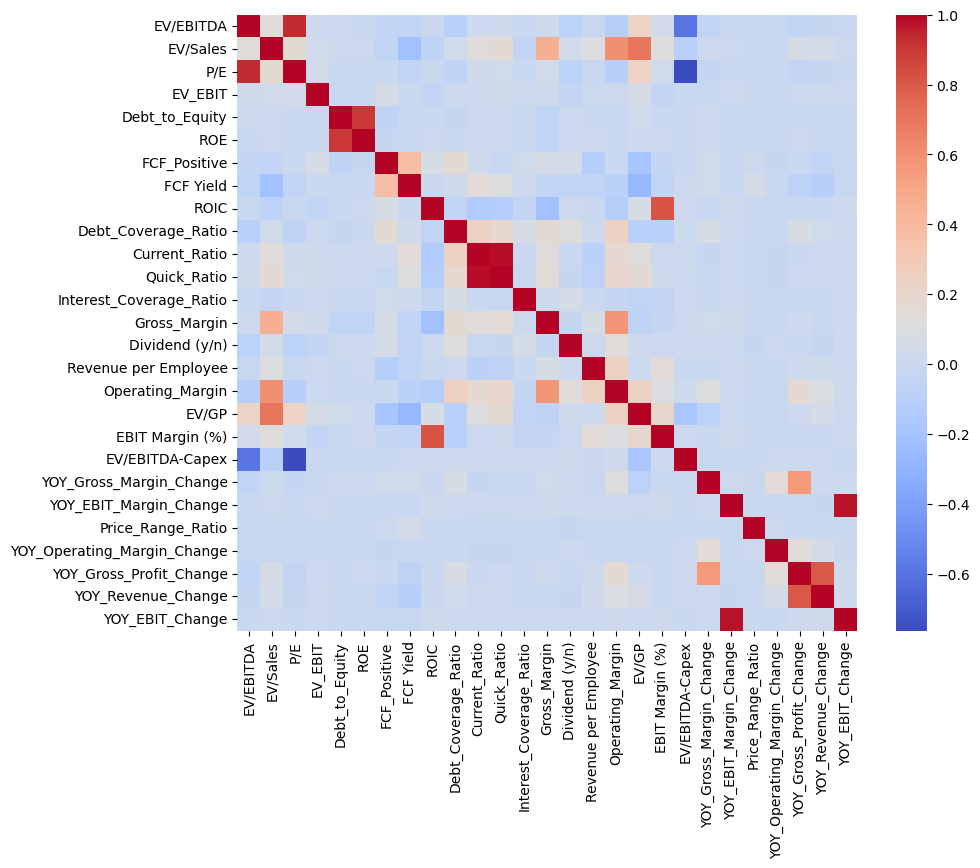

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation Analysis

columns_to_drop = ['Ticker'] + ['Division']

# Create a new dataframe without the specified columns
corr_df = selected_df.drop(columns=columns_to_drop)
corr = corr_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.show()

## Visualize the correlations across industries... see if significant differences
- we may end up focusing in on the most populated industry

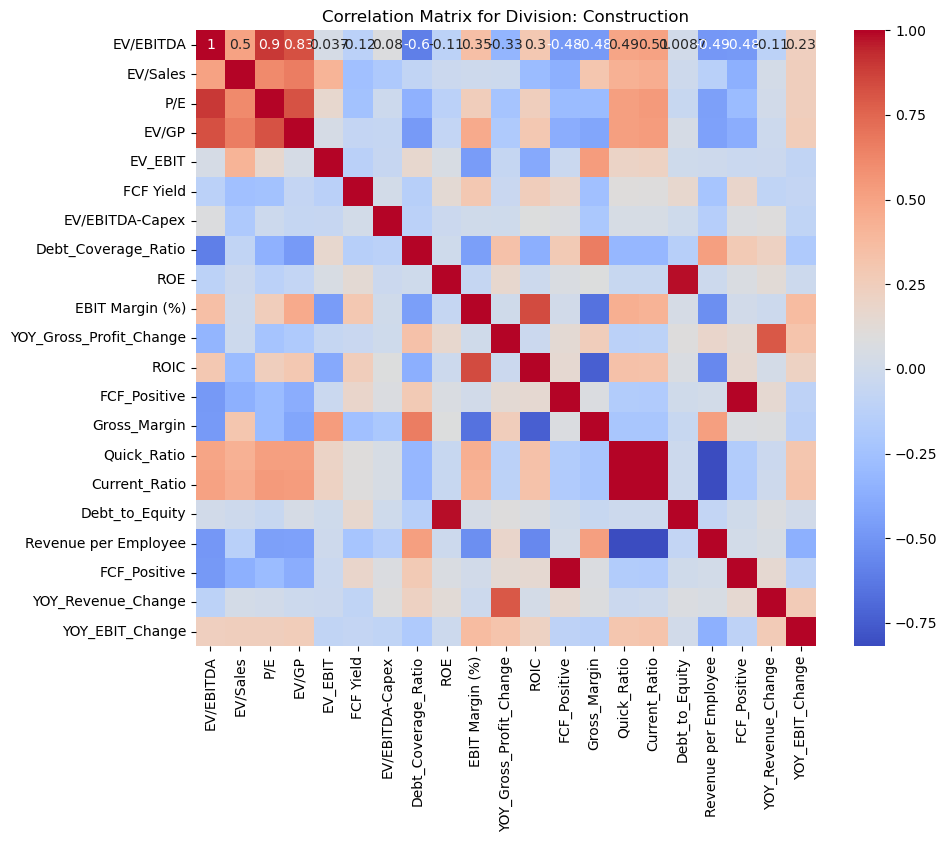

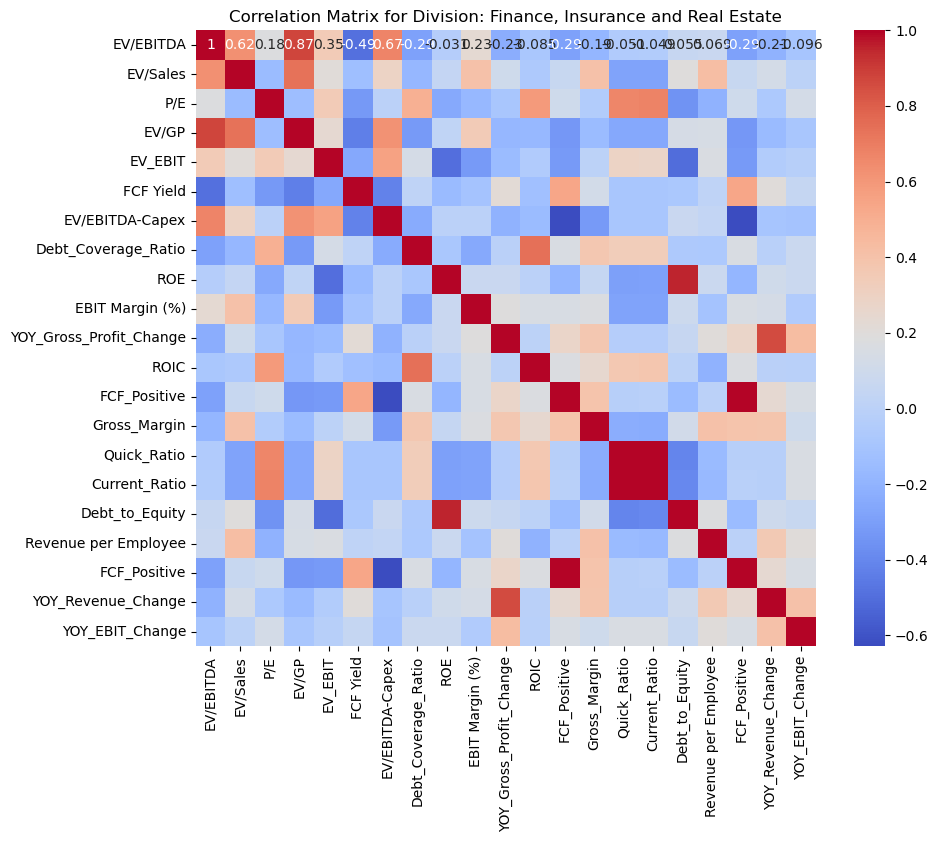

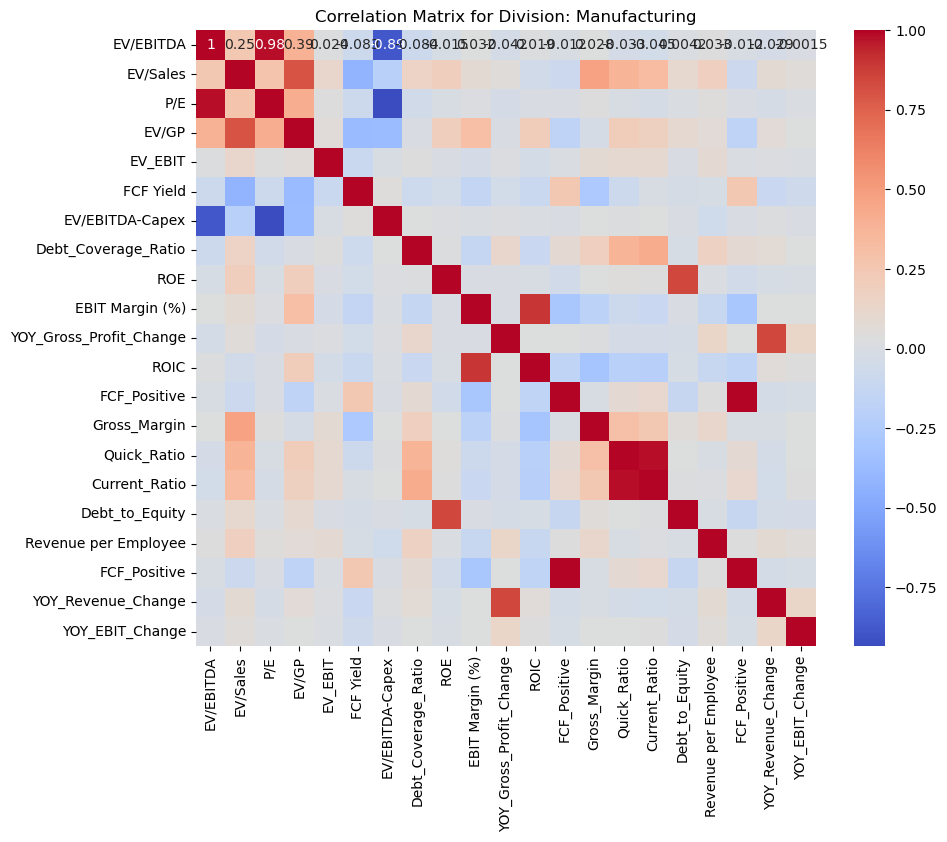

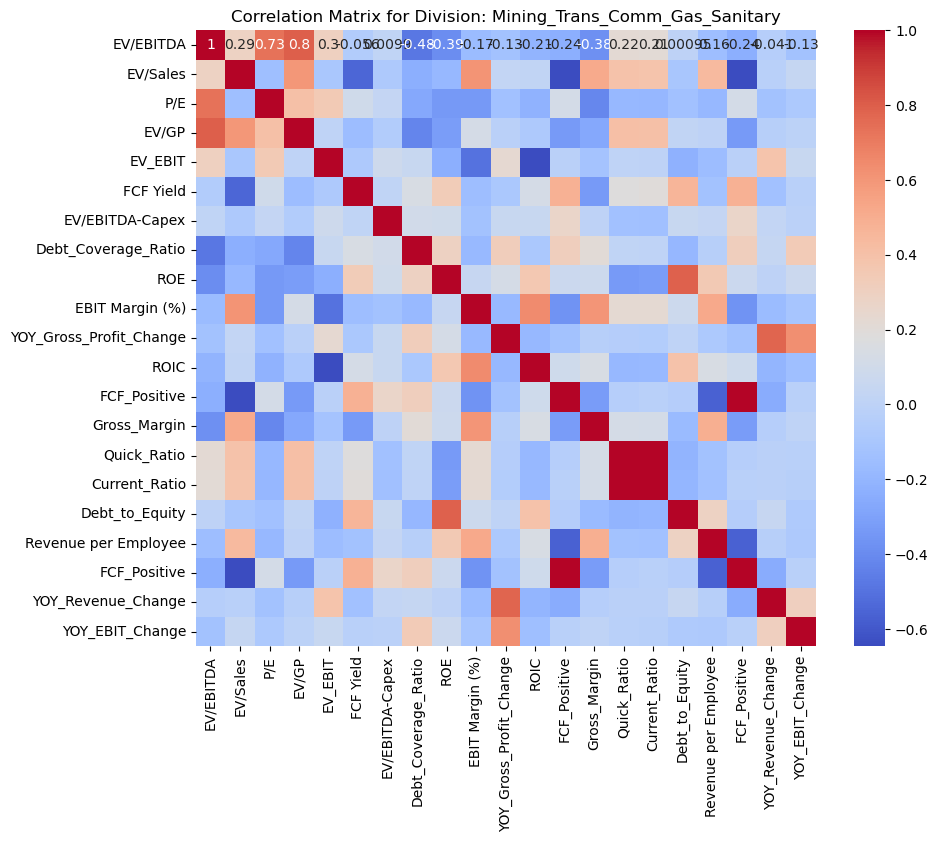

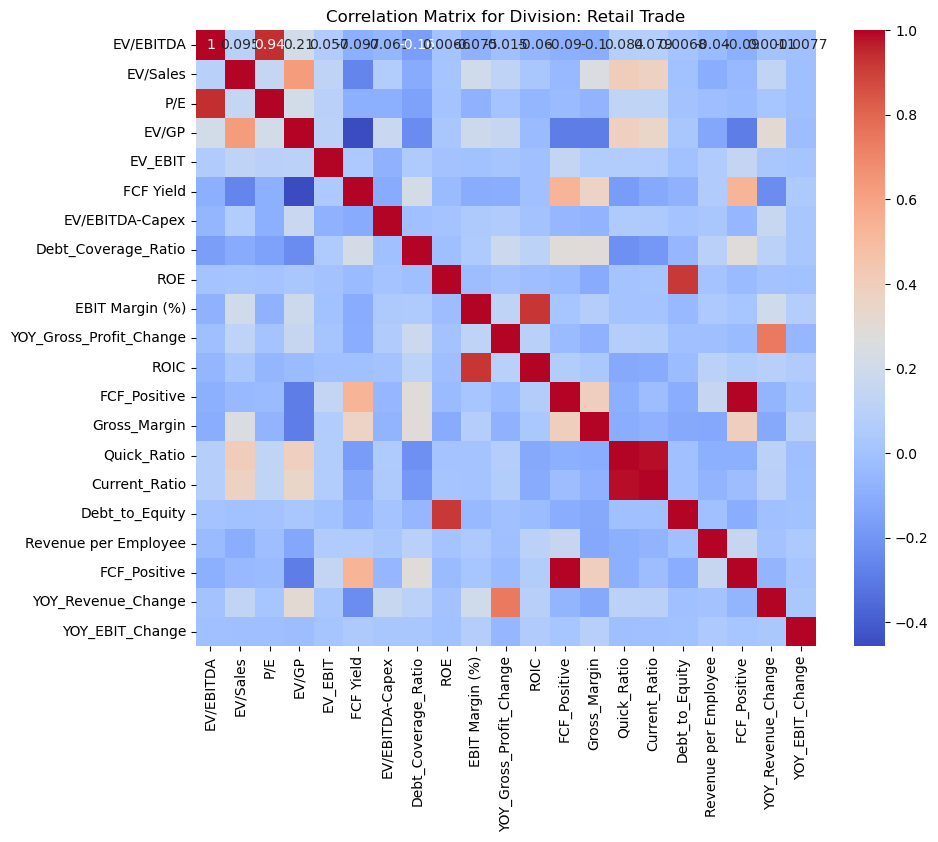

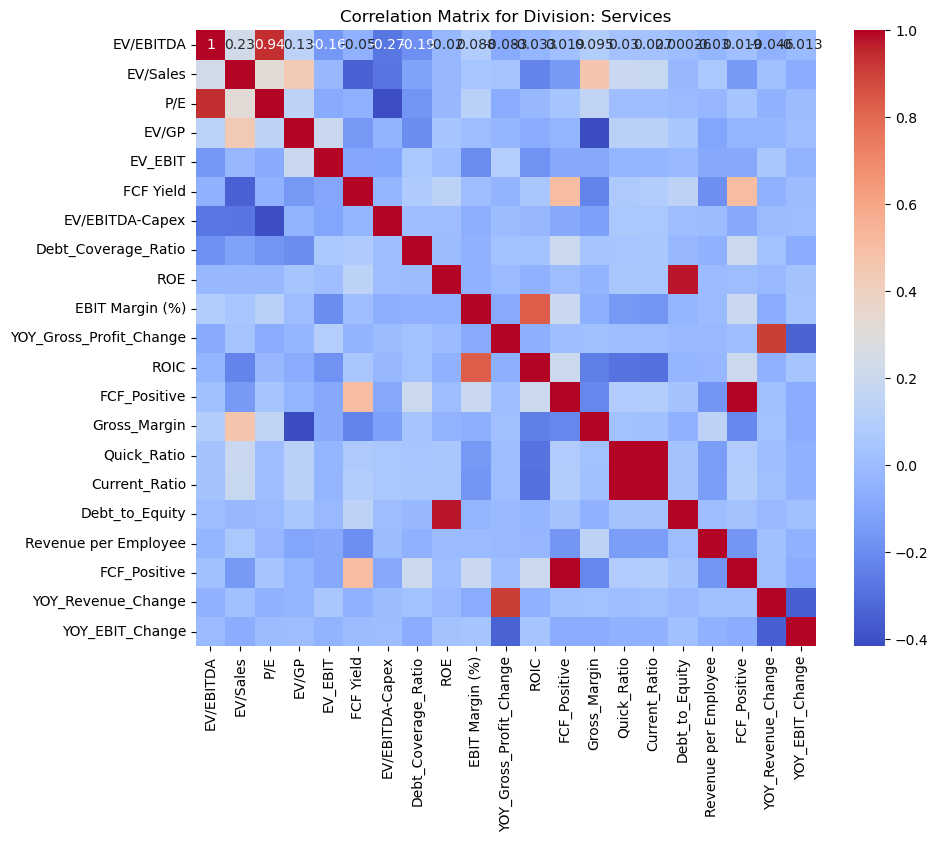

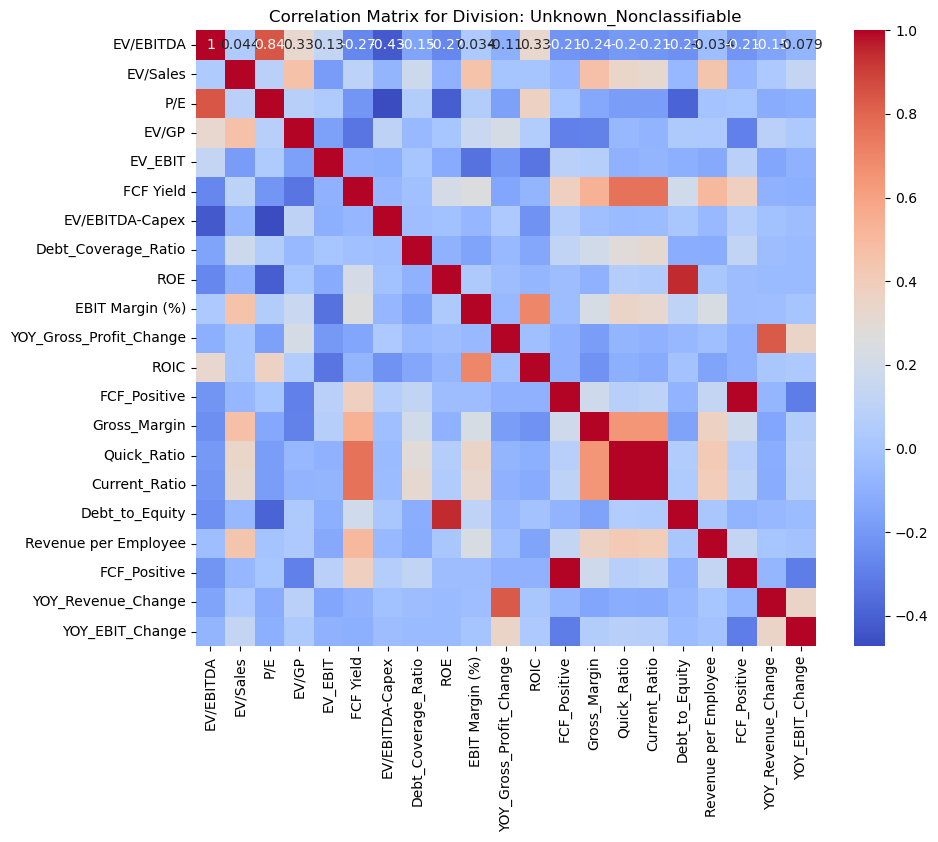

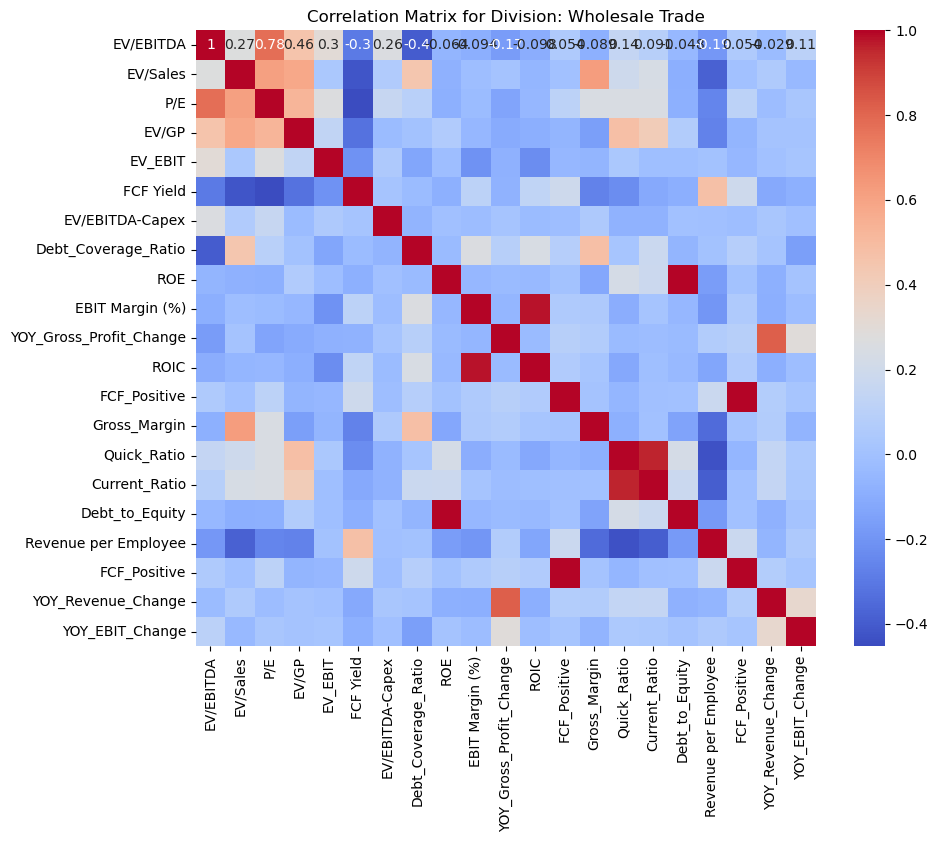

In [14]:
# Define the multiples and metrics
multiples = ['EV/EBITDA', 'EV/Sales', 'P/E', 'EV/GP','EV_EBIT','FCF Yield','EV/EBITDA-Capex']
metrics = ['Debt_Coverage_Ratio', 'ROE', 'EBIT Margin (%)',
           'YOY_Gross_Profit_Change','ROIC','FCF_Positive',
           'Gross_Margin','Quick_Ratio','Current_Ratio','Debt_to_Equity',
           'Revenue per Employee','FCF_Positive','YOY_Revenue_Change','YOY_EBIT_Change']

# Drop the specified non-numeric columns
columns_to_drop = ['Ticker', 'Division']

# Iterate over each unique Division in the dataset
grouped_data = selected_df.groupby('Division')
for division, group in grouped_data:
    # Drop the non-numeric columns
    group = group.drop(columns=columns_to_drop, errors='ignore')
    
    # Keep only the columns that are multiples or metrics
    subset = group[multiples + metrics].select_dtypes(include='number')
    
    # Calculate the correlation matrix
    corr = subset.corr()
    
    # Plot the correlation matrix using seaborn heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, cmap='coolwarm', annot=True)
    plt.title(f'Correlation Matrix for Division: {division}')
    plt.show()

## Creating Scatter Plots between selected Multiple of Interest vs a Financial Metric 

--- Construction ---


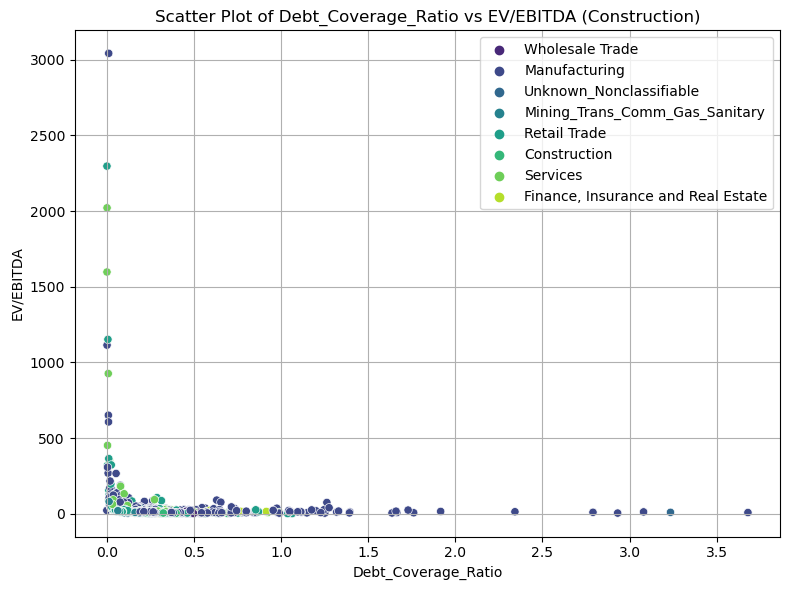

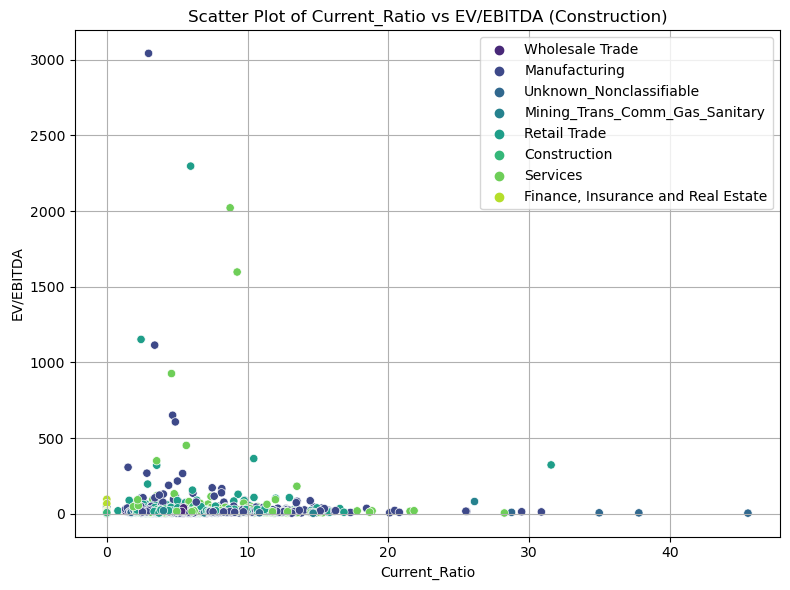

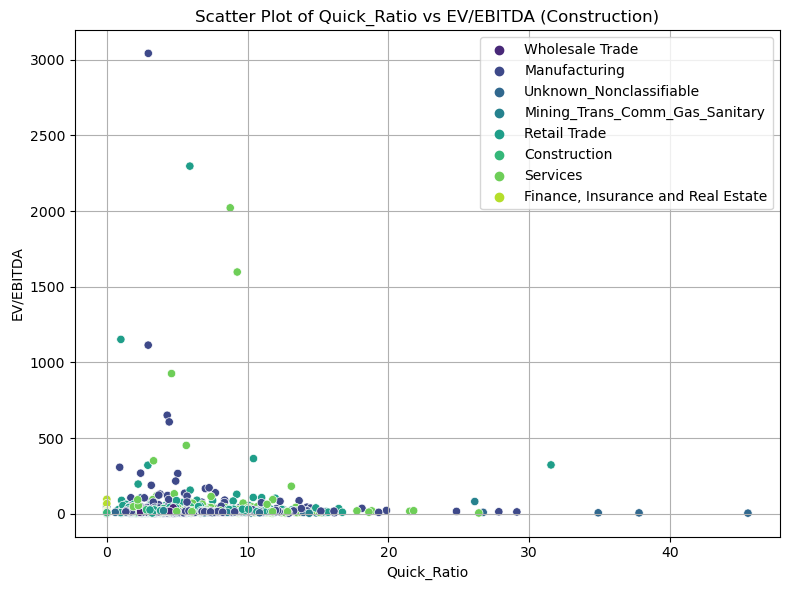

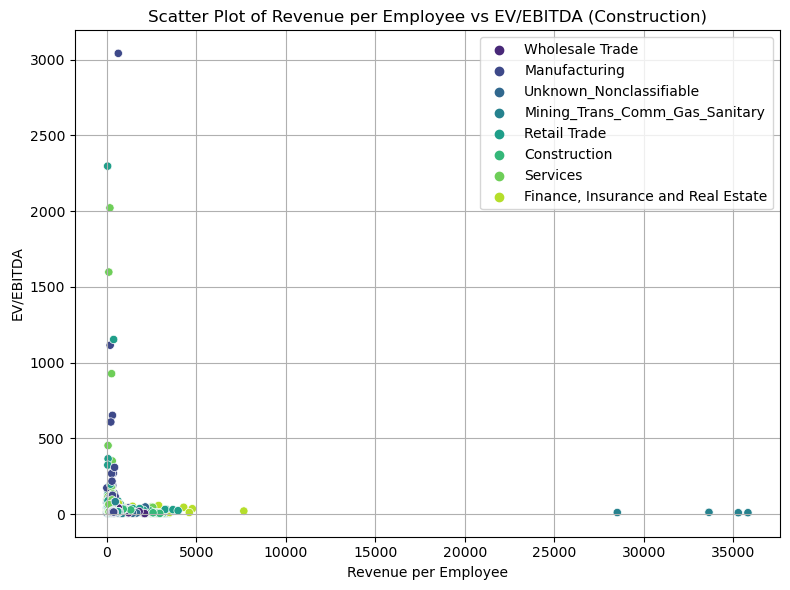

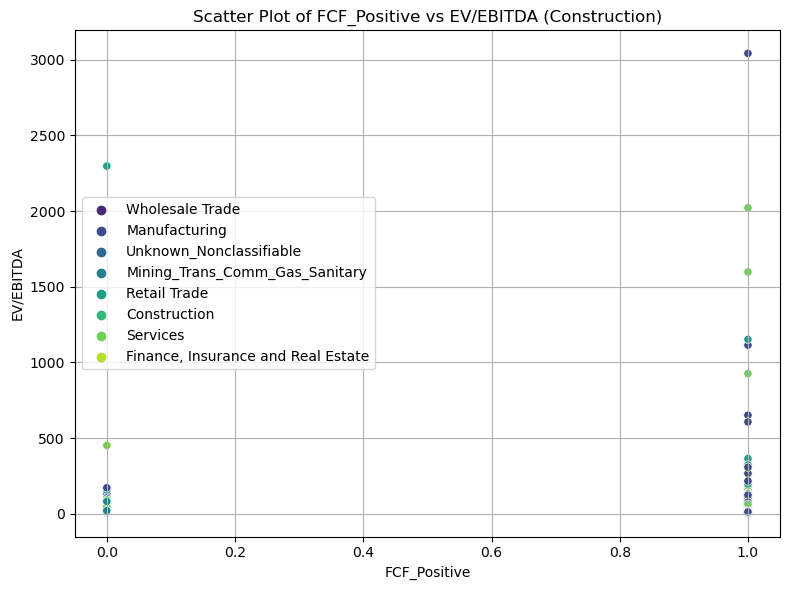

--- Finance, Insurance and Real Estate ---


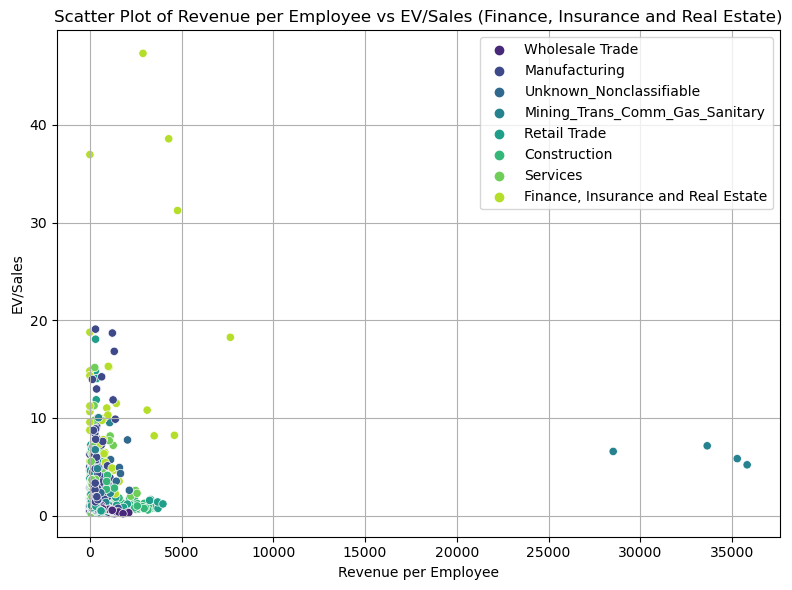

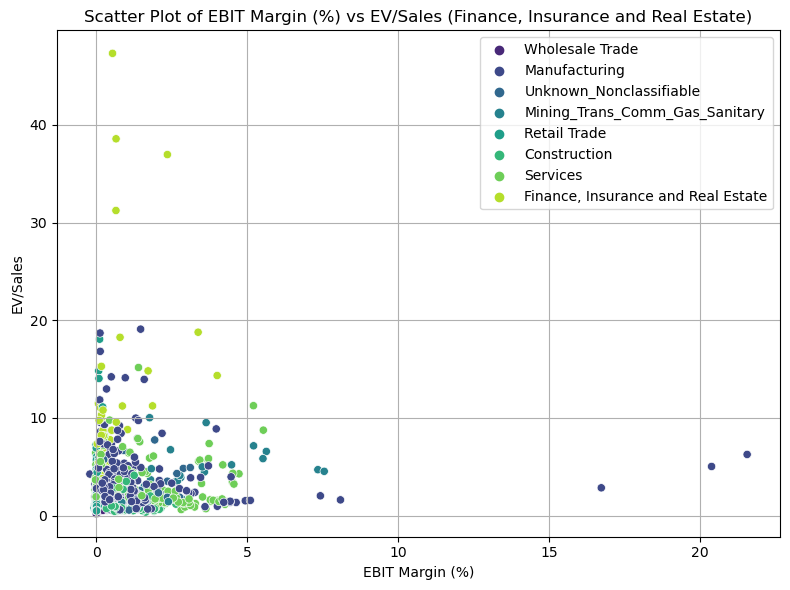

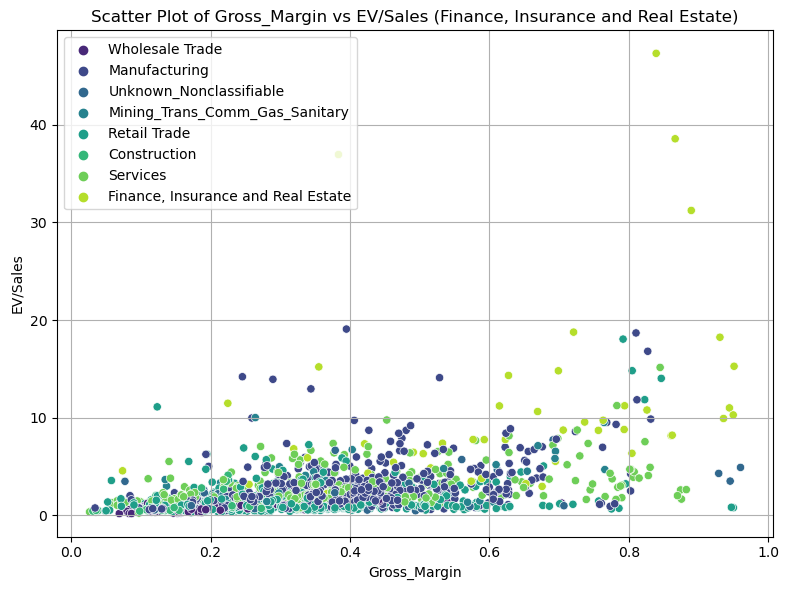

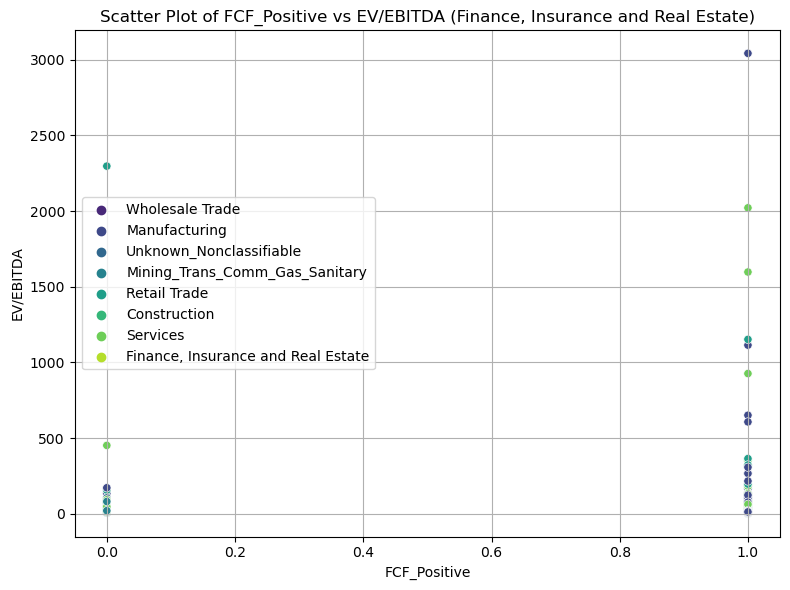

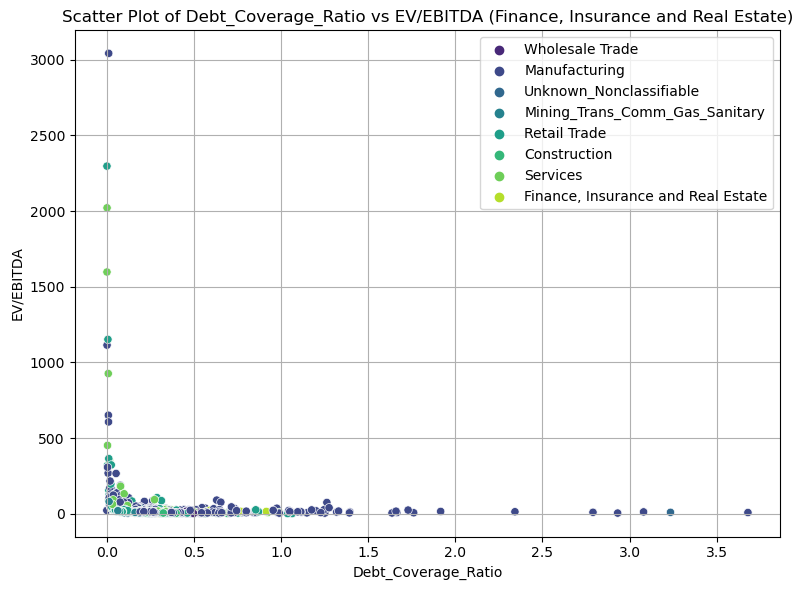

--- Manufacturing ---


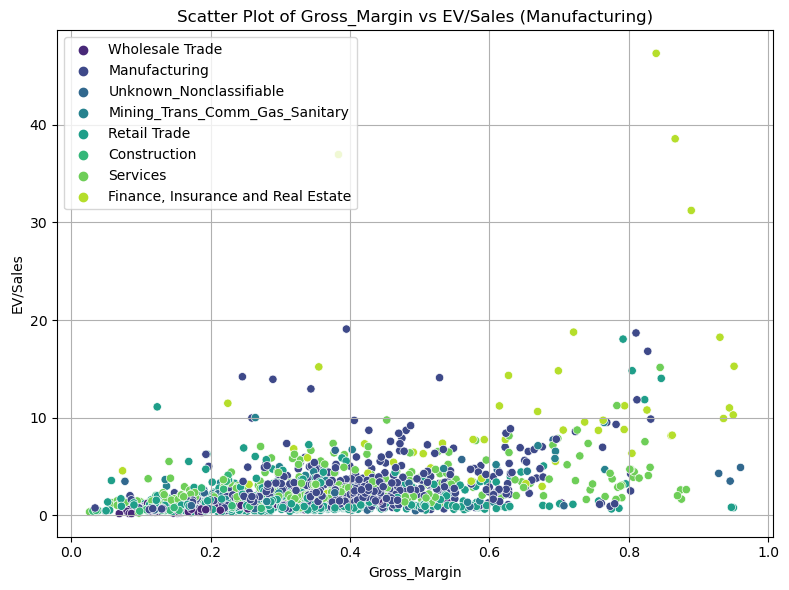

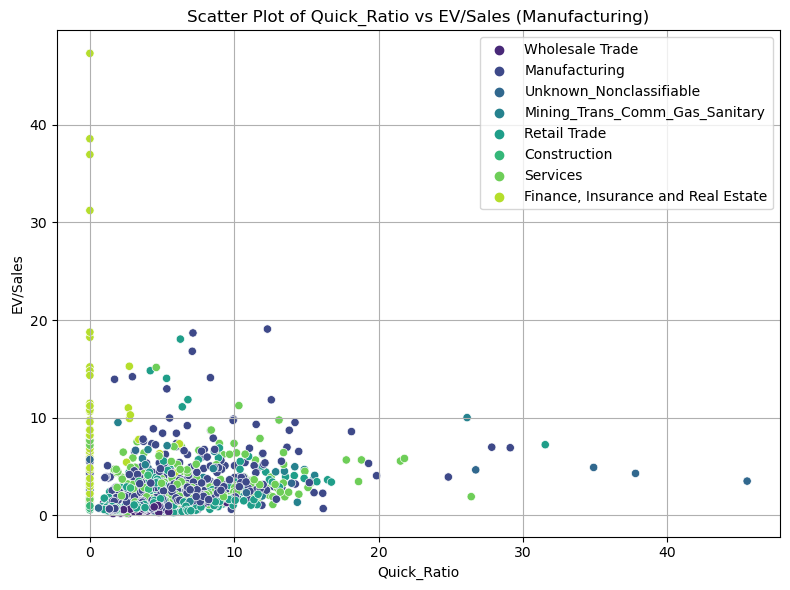

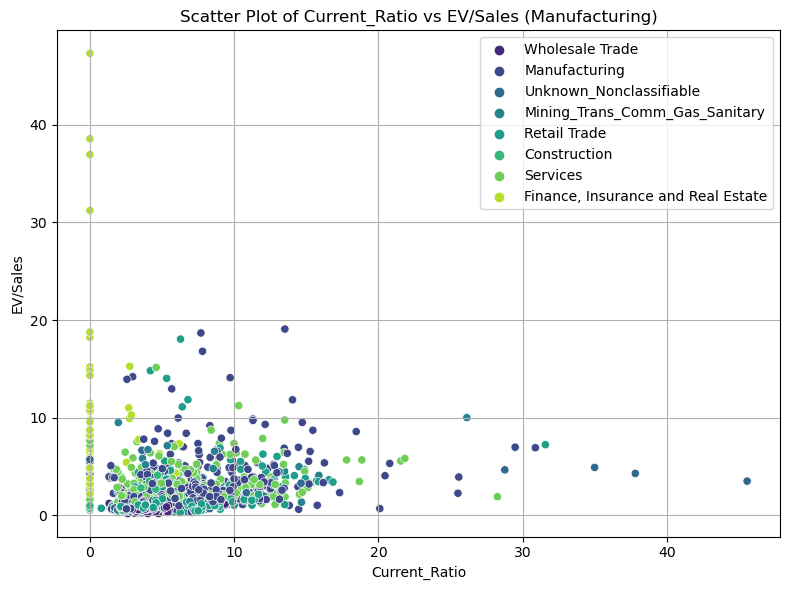

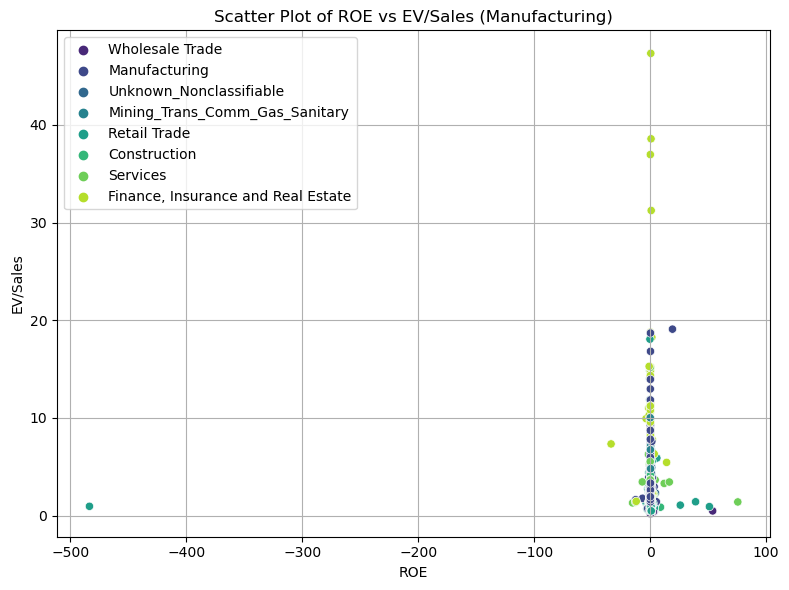

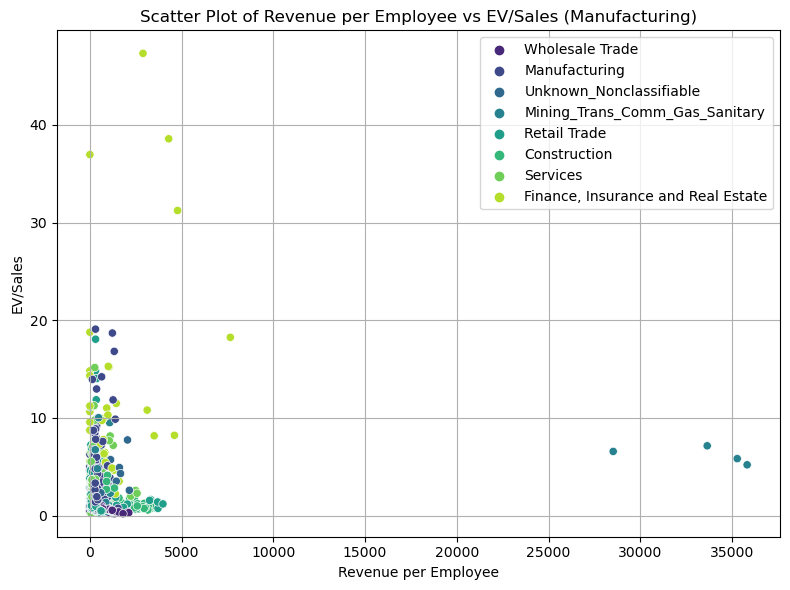

--- Mining_Trans_Comm_Gas_Sanitary ---


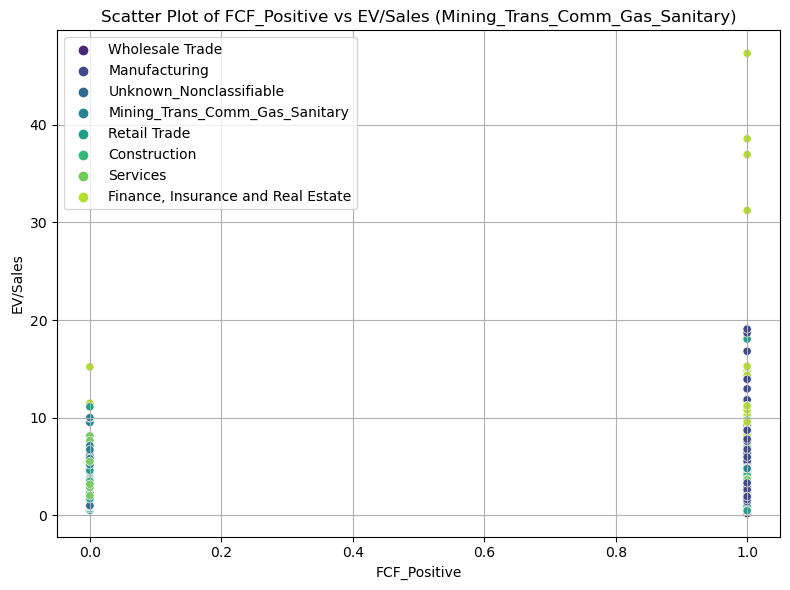

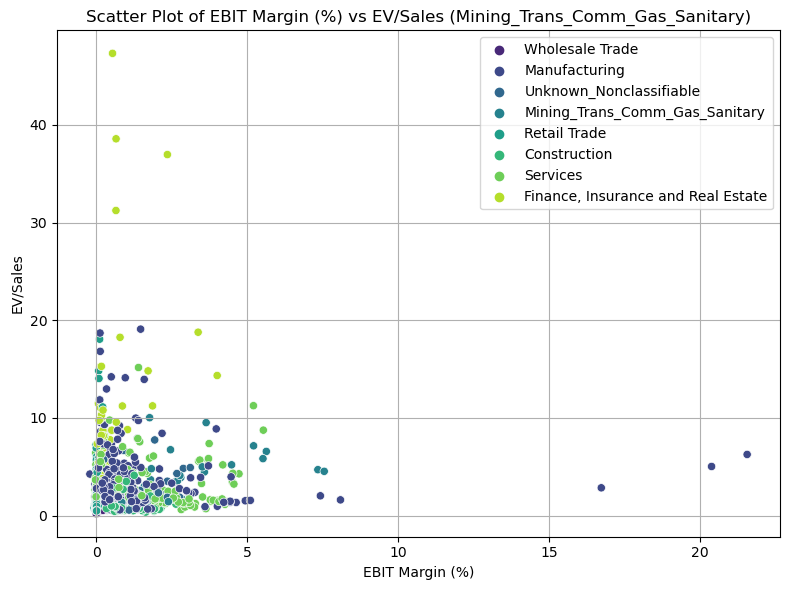

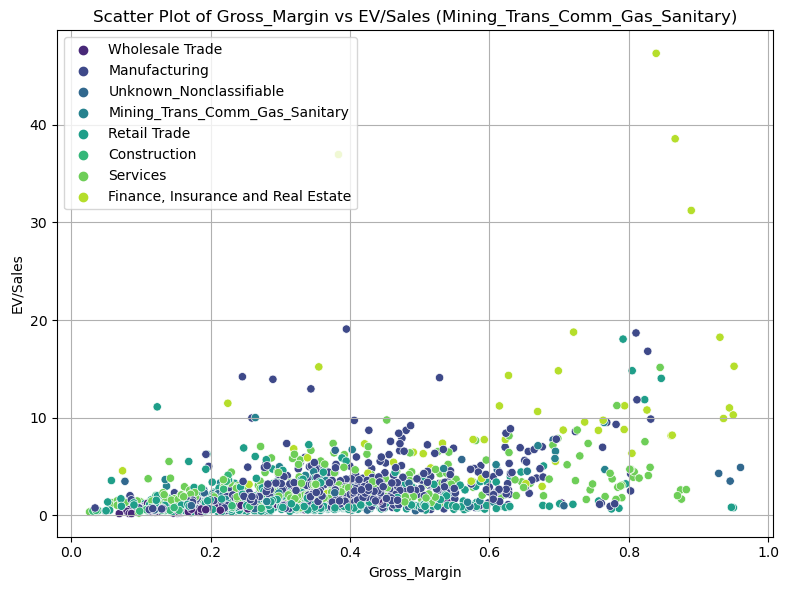

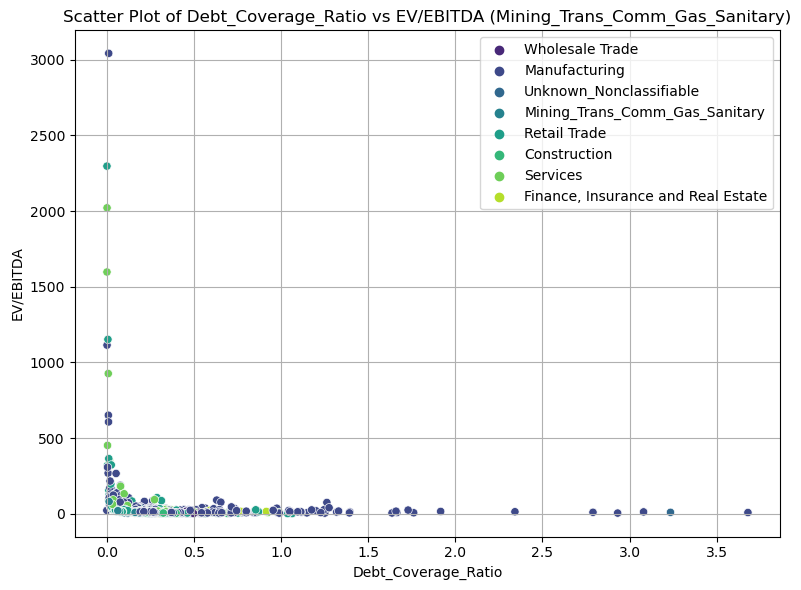

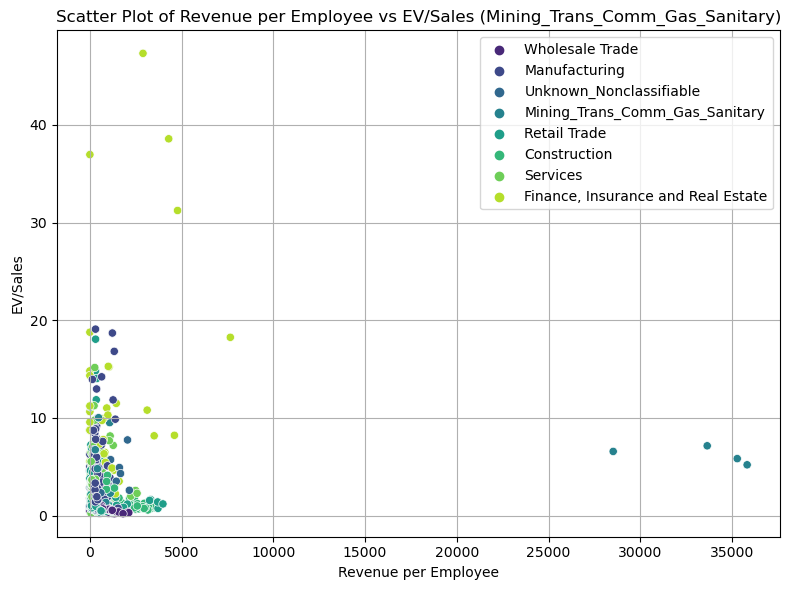

--- Retail Trade ---


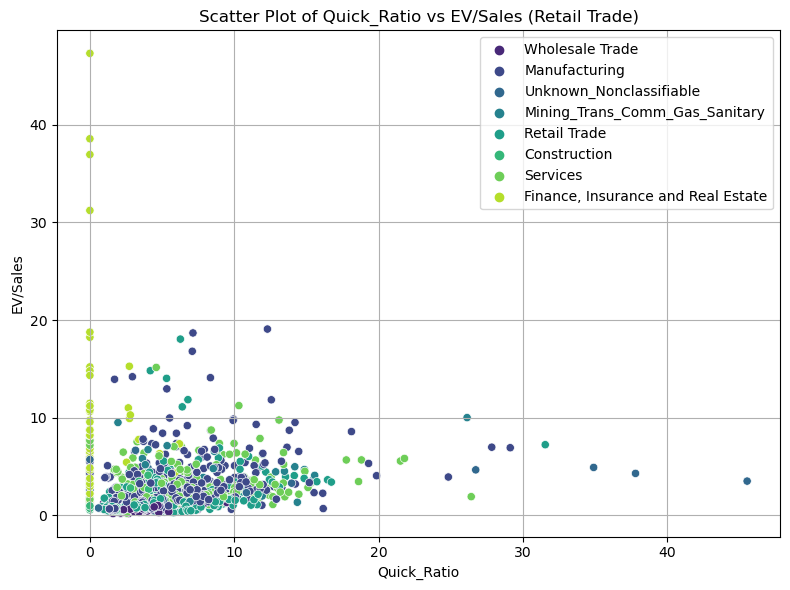

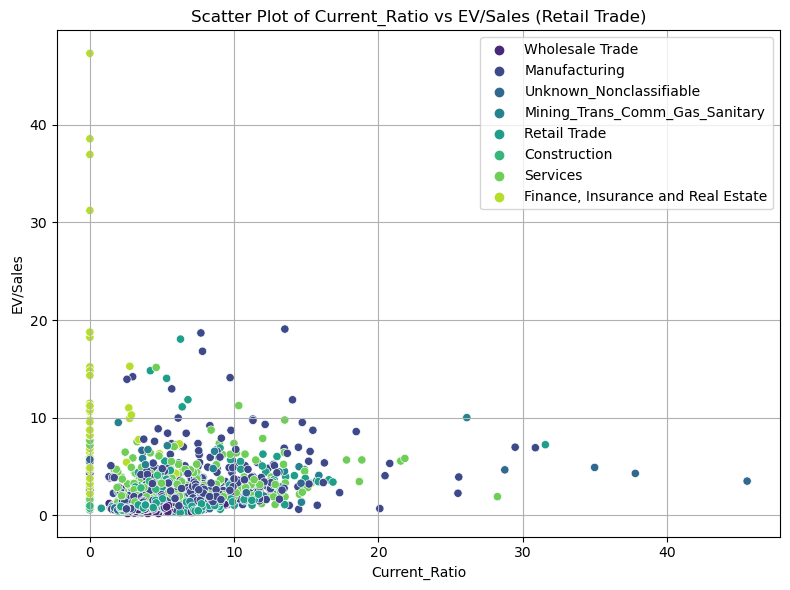

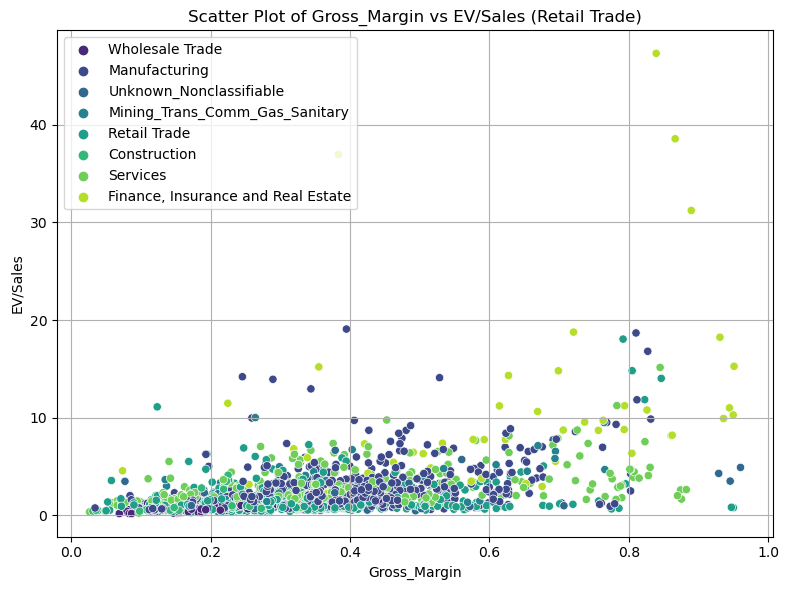

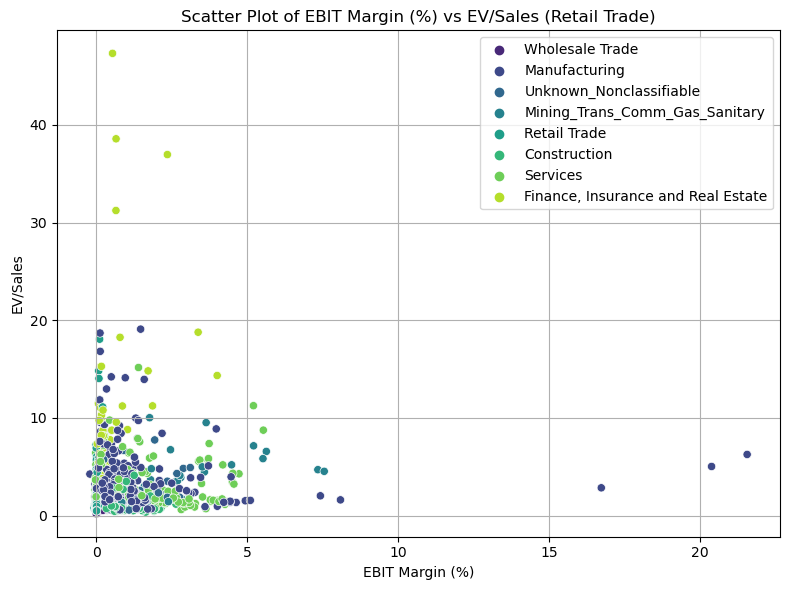

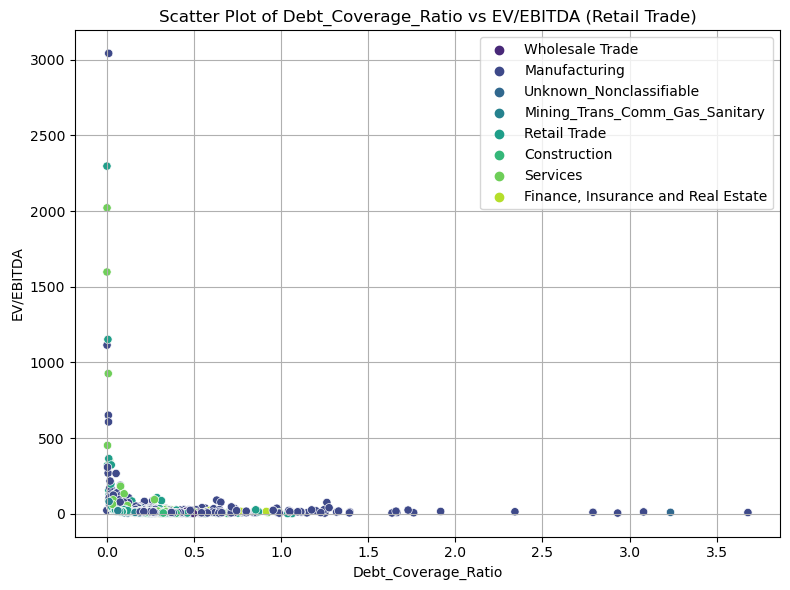

--- Services ---


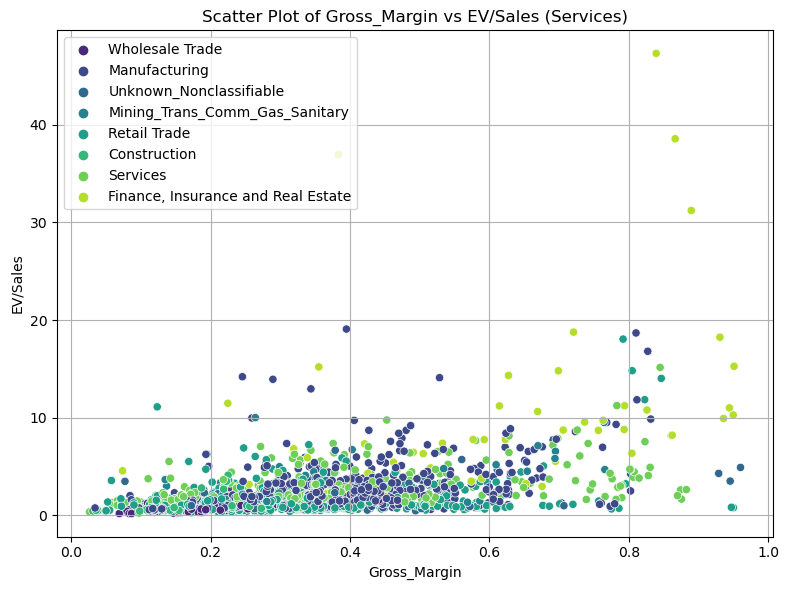

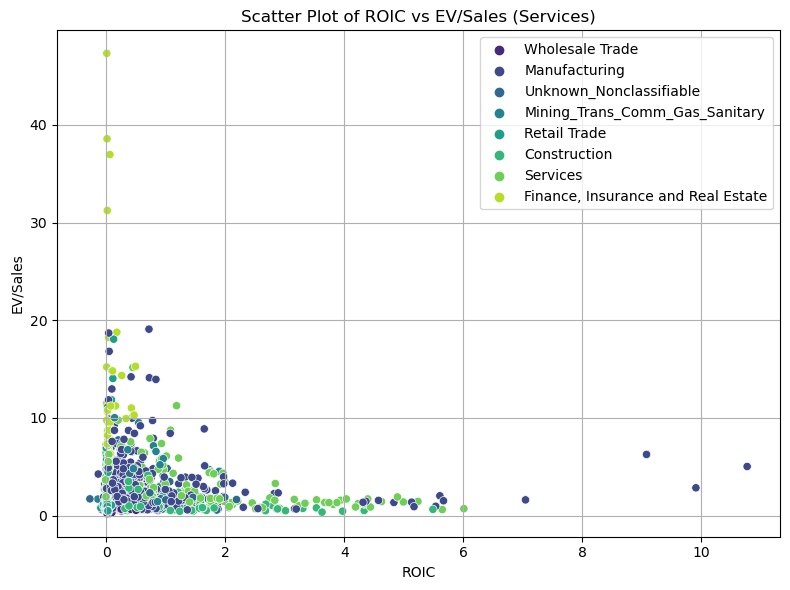

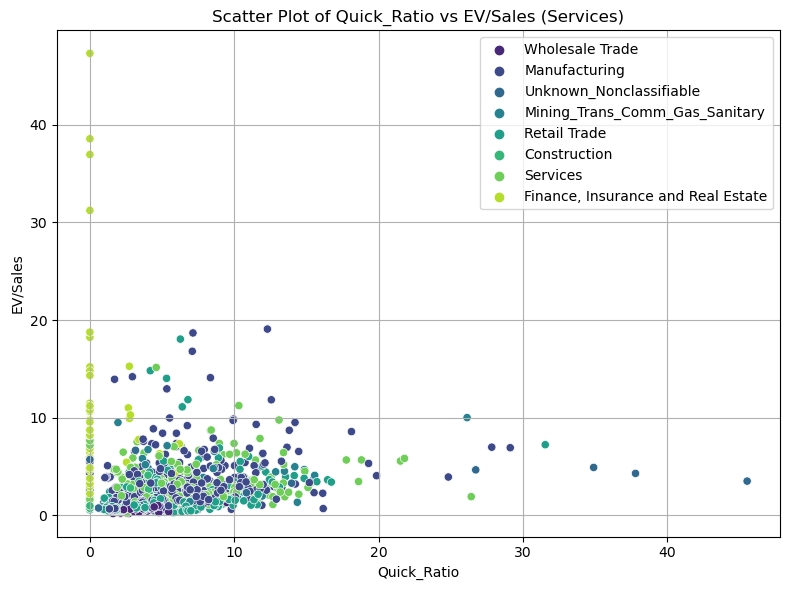

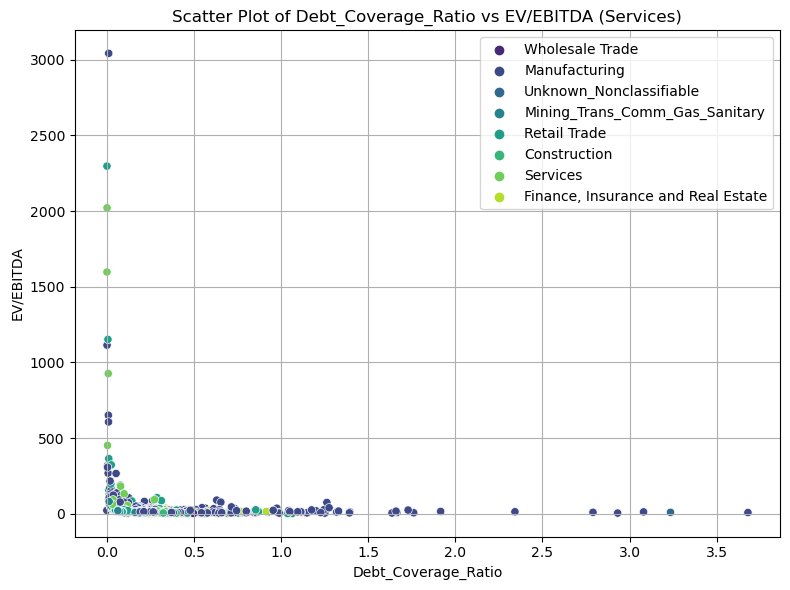

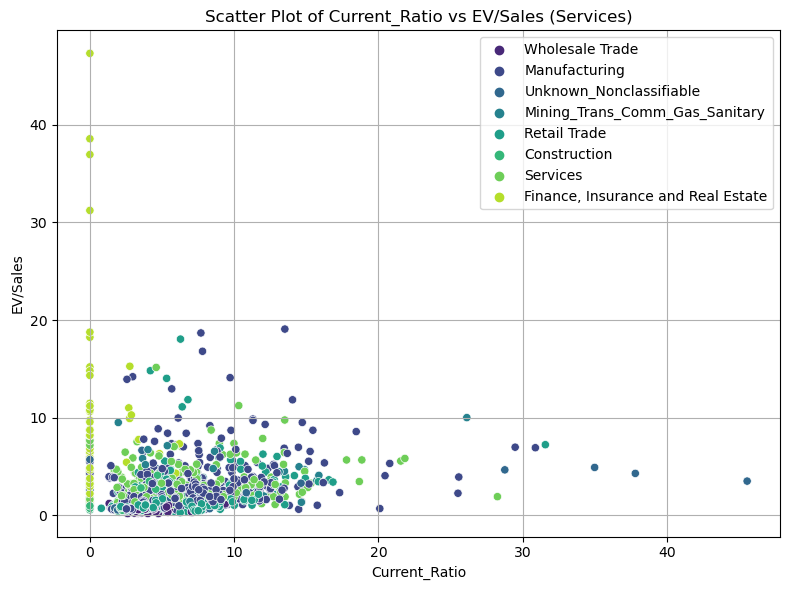

--- Unknown_Nonclassifiable ---


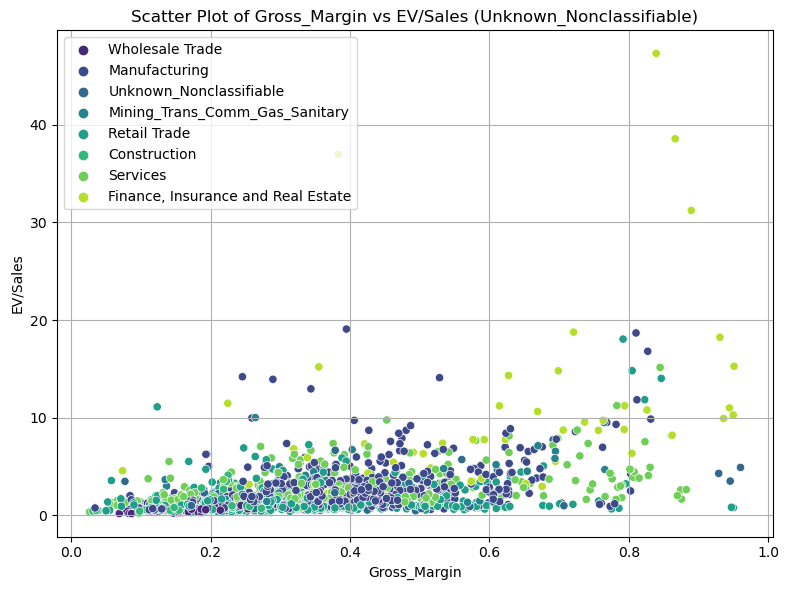

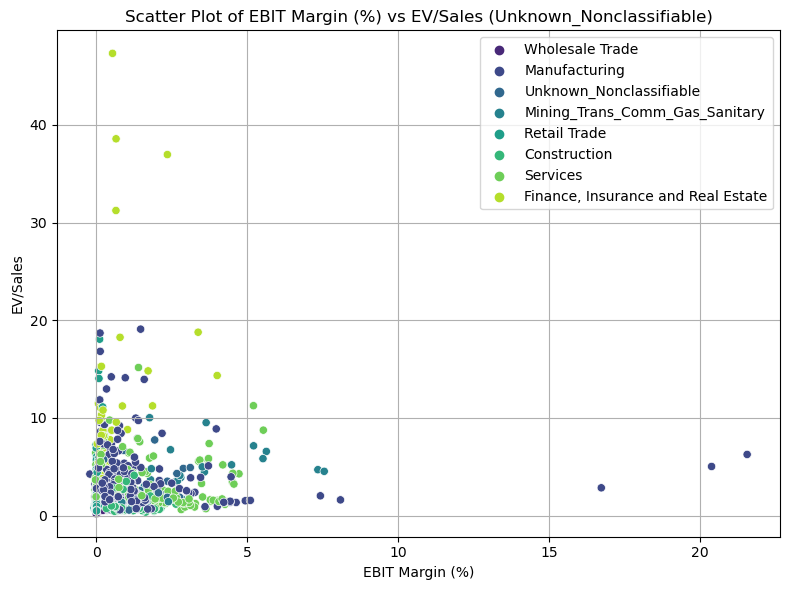

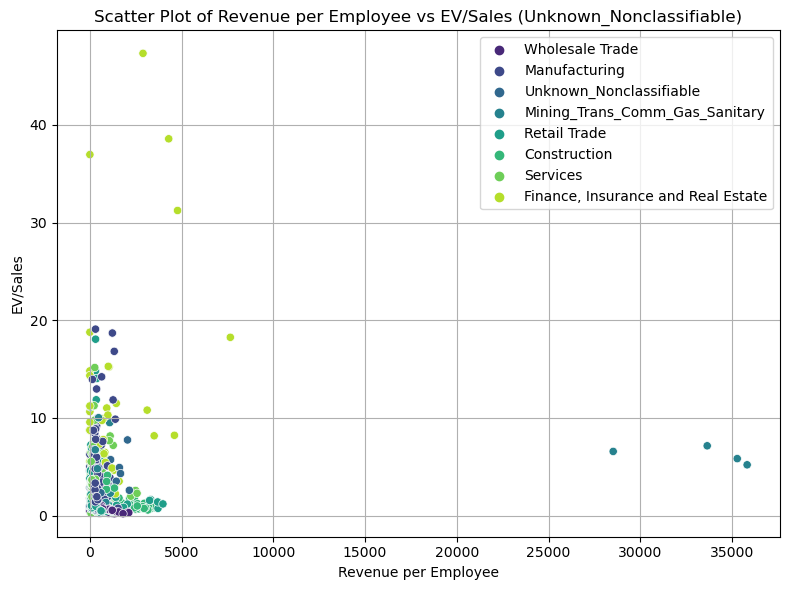

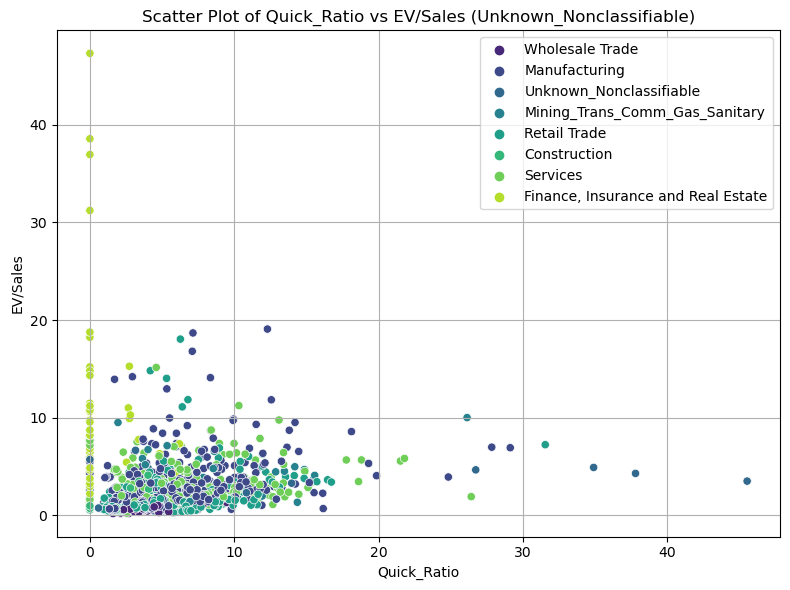

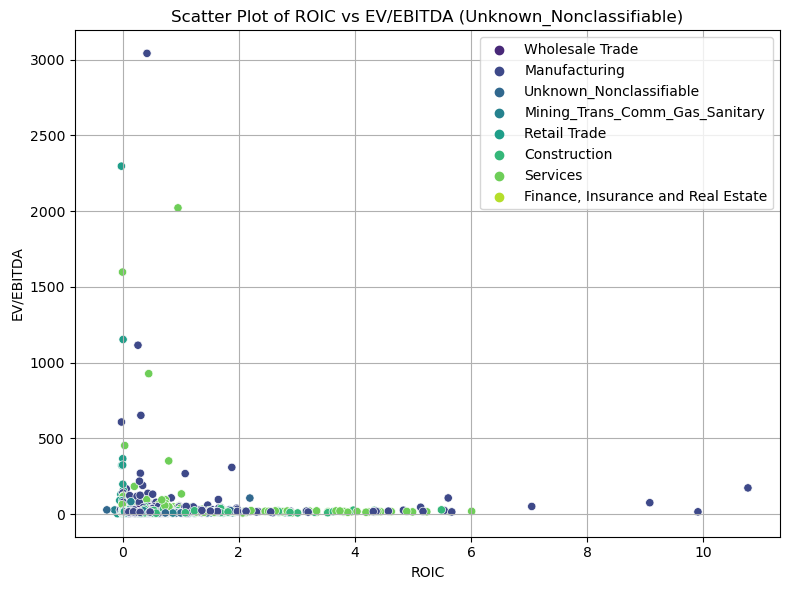

--- Wholesale Trade ---


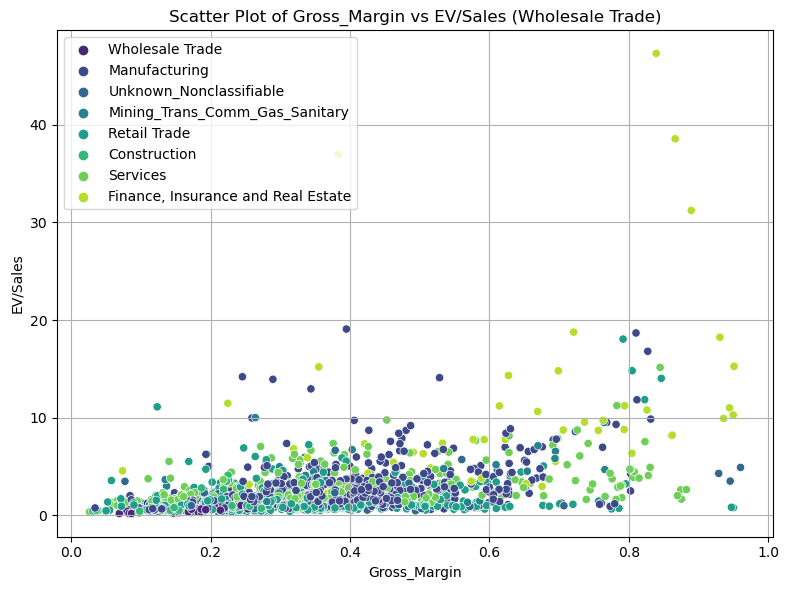

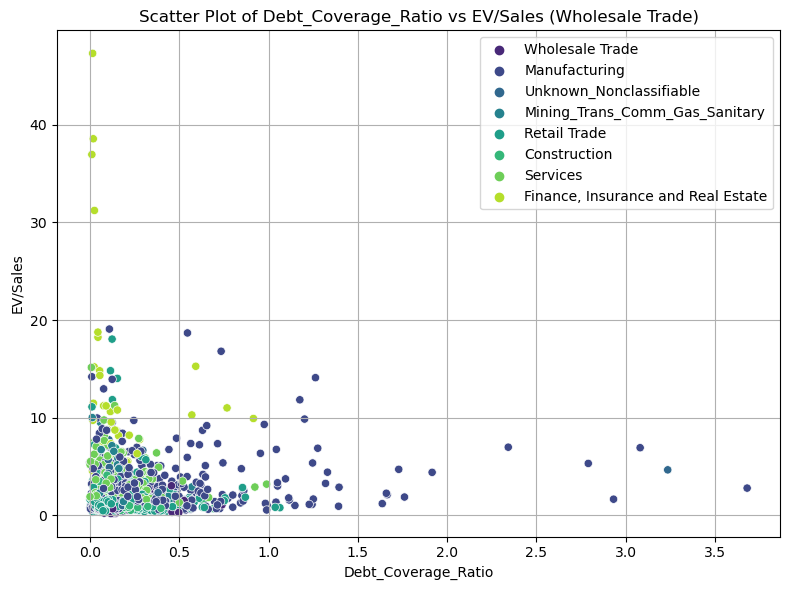

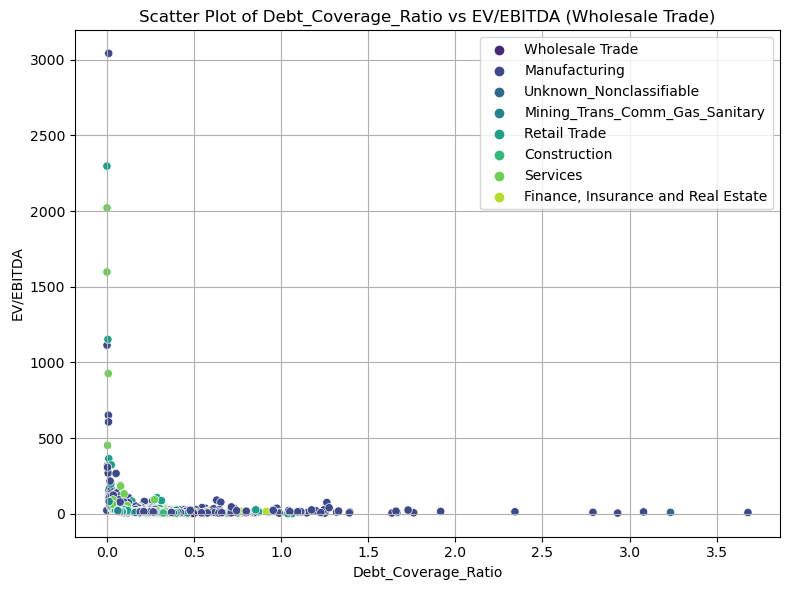

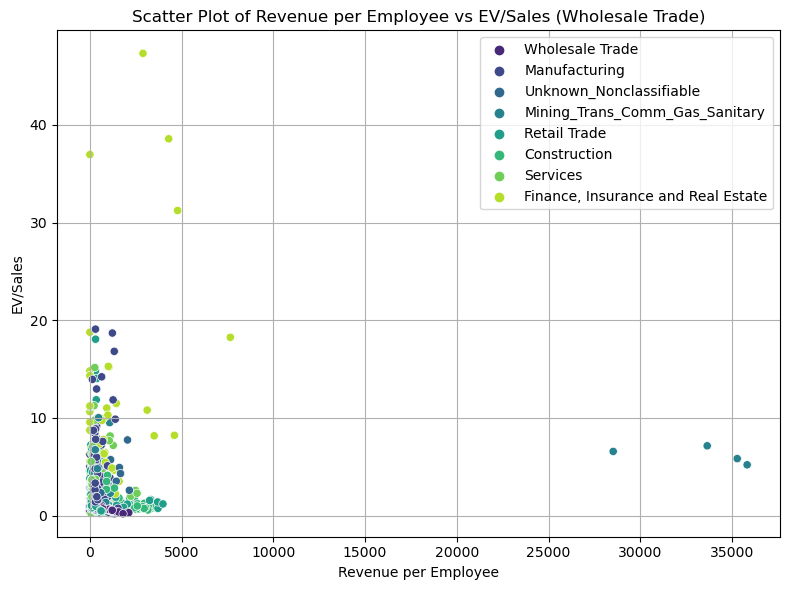

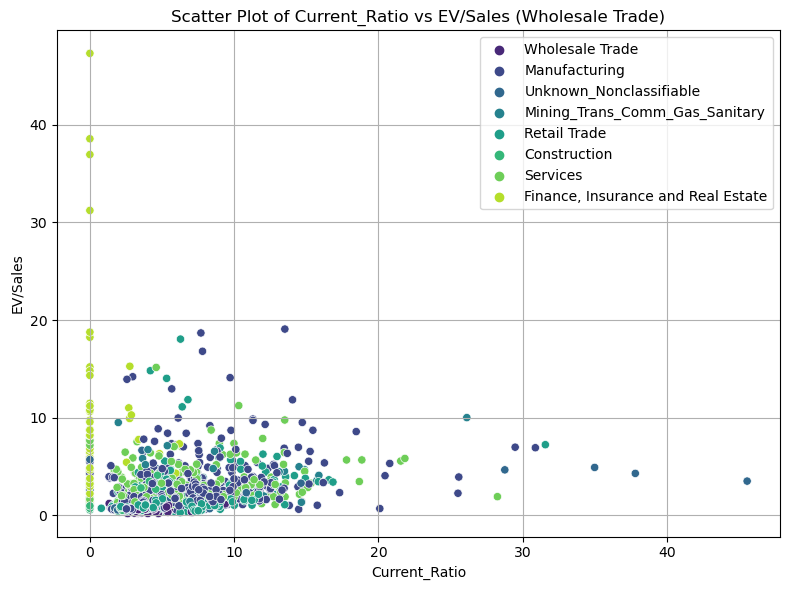

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the multiples and metrics
multiples = ['EV/EBITDA','EV/Sales']  #multiples = ['EV/EBITDA', 'P/E', 'EV/GP','EV_EBIT','FCF Yield','EV/EBITDA-Capex']
metrics = ['Debt_Coverage_Ratio', 'ROE', 'EBIT Margin (%)',
           'YOY_Gross_Profit_Change','ROIC','FCF_Positive',
           'Gross_Margin','Quick_Ratio','Current_Ratio','Debt_to_Equity',
           'Revenue per Employee','FCF_Positive','YOY_Revenue_Change','YOY_EBIT_Change']

# Group data by sector
grouped_data = selected_df.groupby('Division')

# Calculate correlation between multiples and metrics for each sector
correlation_results = {}
for sector, group in grouped_data:
    correlation_results[sector] = {}
    for multiple in multiples:
        for metric in metrics:
            correlation = group[multiple].corr(group[metric])
            correlation_results[sector][(multiple, metric)] = correlation

# Sort correlation results and select top 5 correlations
top_correlations = {}
for sector, result in correlation_results.items():
    top_correlations[sector] = sorted(result.items(), key=lambda x: abs(x[1]), reverse=True)[:5]

# Plot scatter plots for top 5 correlations
for sector, correlations in top_correlations.items():
    print(f"--- {sector} ---")
    for (multiple, metric), correlation in correlations:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=selected_df, x=metric, y=multiple, hue='Division', palette='viridis')
        plt.title(f'Scatter Plot of {metric} vs {multiple} ({sector})')
        plt.xlabel(metric)
        plt.ylabel(multiple)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


## Running Regressions (MLRs) between selected Multiples of Interest vs financial metrics

In [16]:
import statsmodels.api as sm

# Assuming 'selected_df' is the DataFrame containing the data

# Define the multiples (dependent variables) and metrics (independent variables)
multiples = ['EV/EBITDA','EV/Sales']  #multiples = ['EV/EBITDA', 'P/E', 'EV/GP','EV_EBIT','FCF Yield','EV/EBITDA-Capex']
metrics = ['Debt_Coverage_Ratio', 'ROE', 'EBIT Margin (%)',
           'YOY_Gross_Profit_Change','ROIC','FCF_Positive',
           'Gross_Margin','Quick_Ratio','Current_Ratio','Debt_to_Equity',
           'Revenue per Employee','FCF_Positive','YOY_Revenue_Change','YOY_EBIT_Change']

# Group data by Division
grouped_data = selected_df.groupby('Division')

# Perform MLR for each multiple by each industry
for division, group in grouped_data:
    print(f'\nDivision: {division}')
    
    # Drop non-numeric columns and keep only columns with multiples and metrics
    group = group[multiples + metrics].select_dtypes(include='number')
    
    for multiple in multiples:
        # Prepare the dependent (y) and independent (X) variables
        if multiple in group.columns:
            y = group[multiple].dropna()  # Drop missing values
            X = group.loc[y.index, metrics].dropna()
            
            # Add a constant to the model (intercept term)
            X = sm.add_constant(X)
            
            # Fit the model
            model = sm.OLS(y, X).fit()
            
            # Print the summary of the model
            print(f'\nMultiple: {multiple}')
            print(model.summary())


Division: Construction

Multiple: EV/EBITDA
                            OLS Regression Results                            
Dep. Variable:              EV/EBITDA   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     18.76
Date:                Mon, 06 May 2024   Prob (F-statistic):           8.54e-22
Time:                        17:49:14   Log-Likelihood:                -334.51
No. Observations:                 119   AIC:                             697.0
Df Residuals:                     105   BIC:                             735.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

## Feature Importance
- identifying what financial metrics drive/influence our multiples of interest
- also doing this at the industry level

In [17]:
from sklearn.model_selection import train_test_split
from interpret.glassbox import ExplainableBoostingRegressor 
from interpret import show

## EV/EBITDA

In [18]:
from sklearn.model_selection import train_test_split
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

# Adjust the data by replacing the division mapping
# This assumes you have already run the division grouping mapping mentioned earlier

# Loop through each unique Division and compute feature importance
for division, group in selected_df.groupby('Division'):
    print(f"\nDivision: {division}")
    
    # Prepare features (X) and target (y)
    X = group.drop(columns=['Ticker', 'Division','EV/EBITDA', 'P/E', 'EV/GP','EV_EBIT','EV/Sales','FCF Yield','EV/EBITDA-Capex'])
    y = group['EV/EBITDA']

    # Check if there are enough samples to perform a split and modeling
    if len(y) < 10:
        print(f"Not enough samples to perform feature selection for {division}")
        continue
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Initialize the ExplainableBoostingRegressor
    ebm = ExplainableBoostingRegressor(random_state=42)

    # Fit the model
    ebm.fit(X_train, y_train)

    # Get the global feature importances from the model
    ebm_global = ebm.explain_global()
    show(ebm_global)


Division: Construction


<!-- http://127.0.0.1:7907/140363028130688/ -->


Division: Finance, Insurance and Real Estate


<!-- http://127.0.0.1:7907/140363010374336/ -->


Division: Manufacturing


<!-- http://127.0.0.1:7907/140362645256176/ -->


Division: Mining_Trans_Comm_Gas_Sanitary


<!-- http://127.0.0.1:7907/140363063787184/ -->


Division: Retail Trade


<!-- http://127.0.0.1:7907/140363061064032/ -->


Division: Services


<!-- http://127.0.0.1:7907/140363018609568/ -->


Division: Unknown_Nonclassifiable


<!-- http://127.0.0.1:7907/140363010121392/ -->


Division: Wholesale Trade


<!-- http://127.0.0.1:7907/140363047907488/ -->


Division: Construction


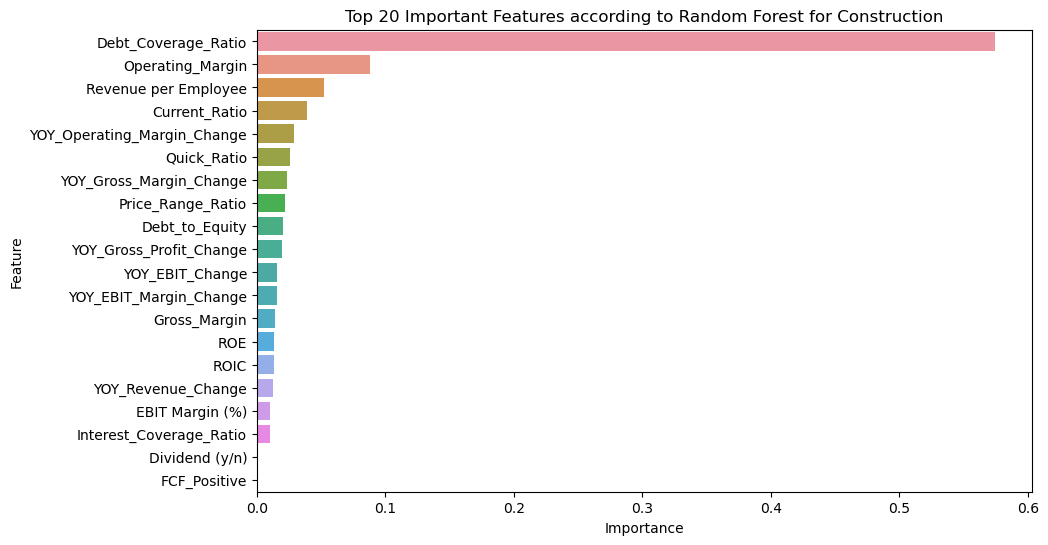


Division: Finance, Insurance and Real Estate


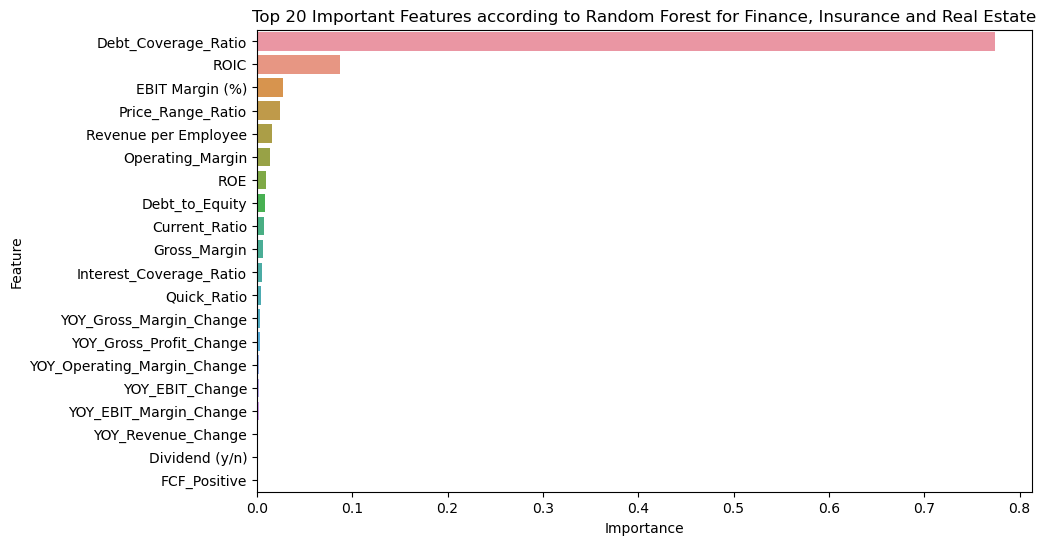


Division: Manufacturing


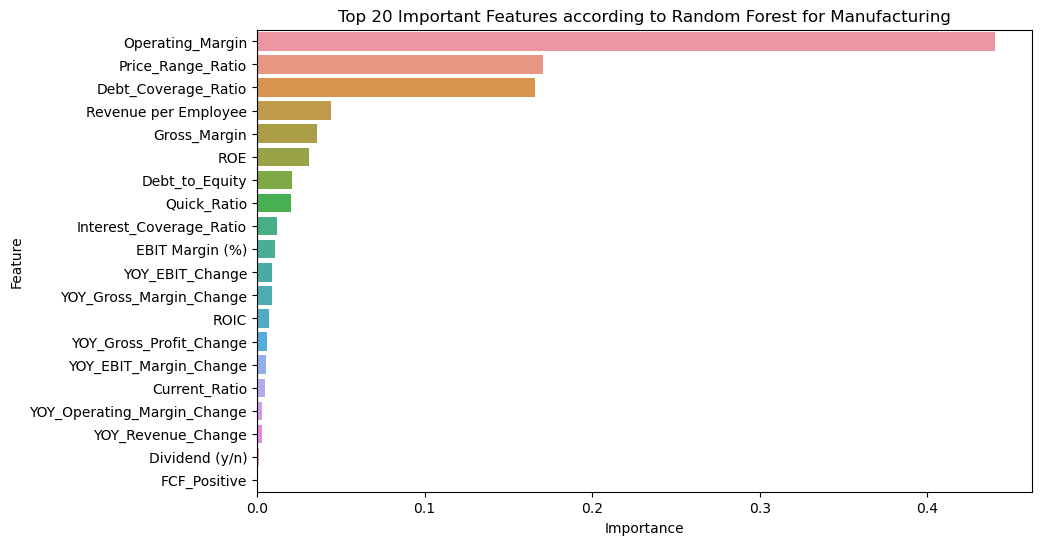


Division: Mining_Trans_Comm_Gas_Sanitary


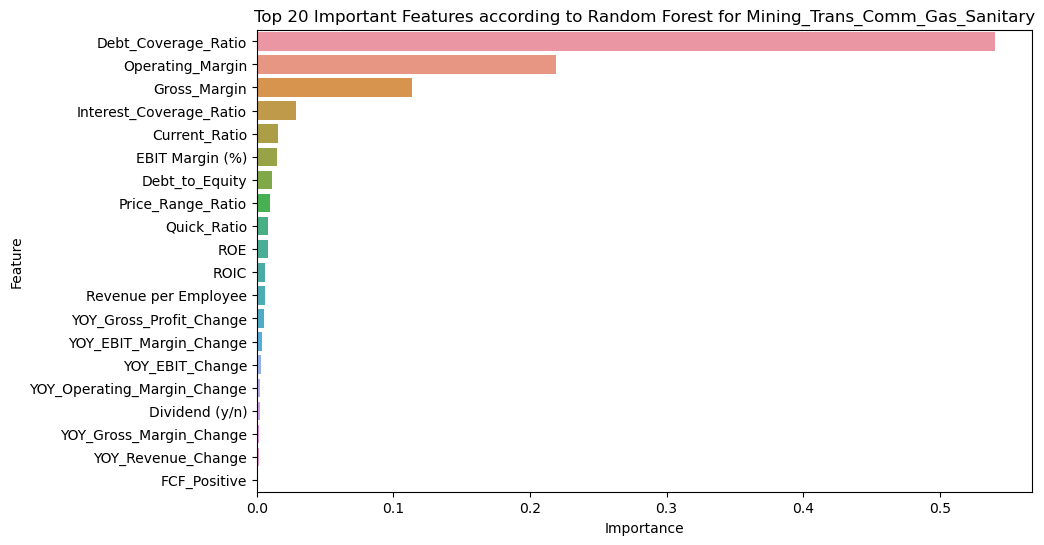


Division: Retail Trade


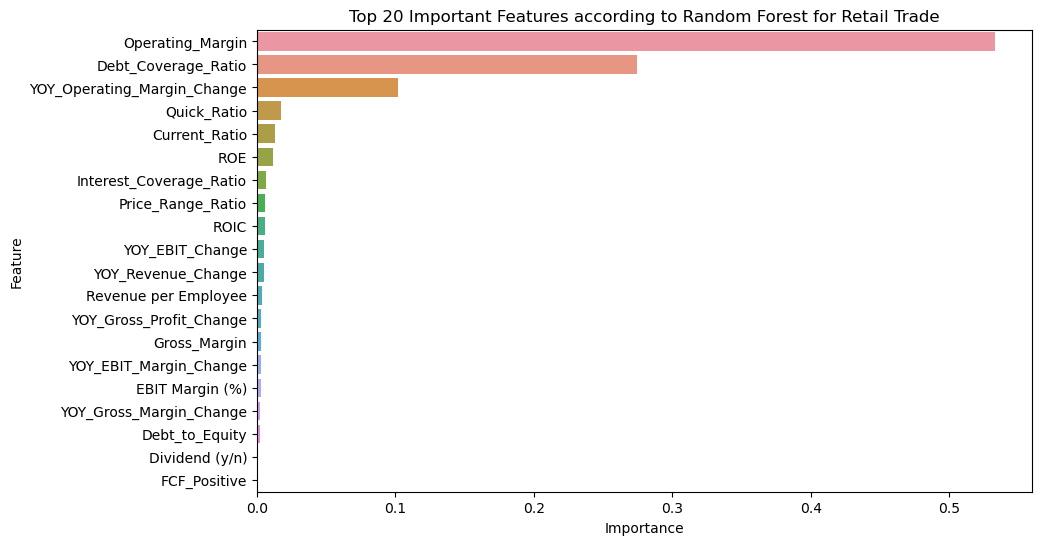


Division: Services


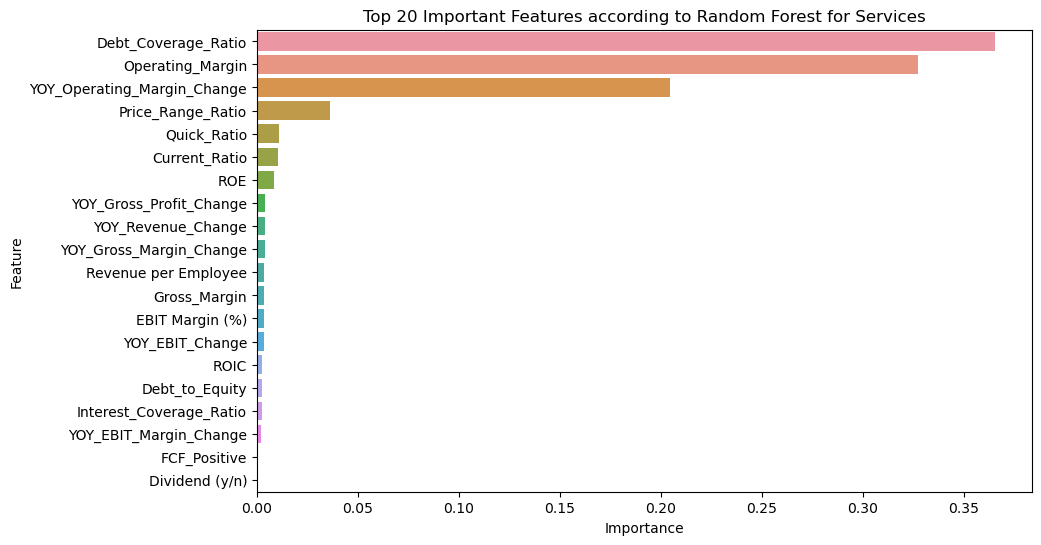


Division: Unknown_Nonclassifiable


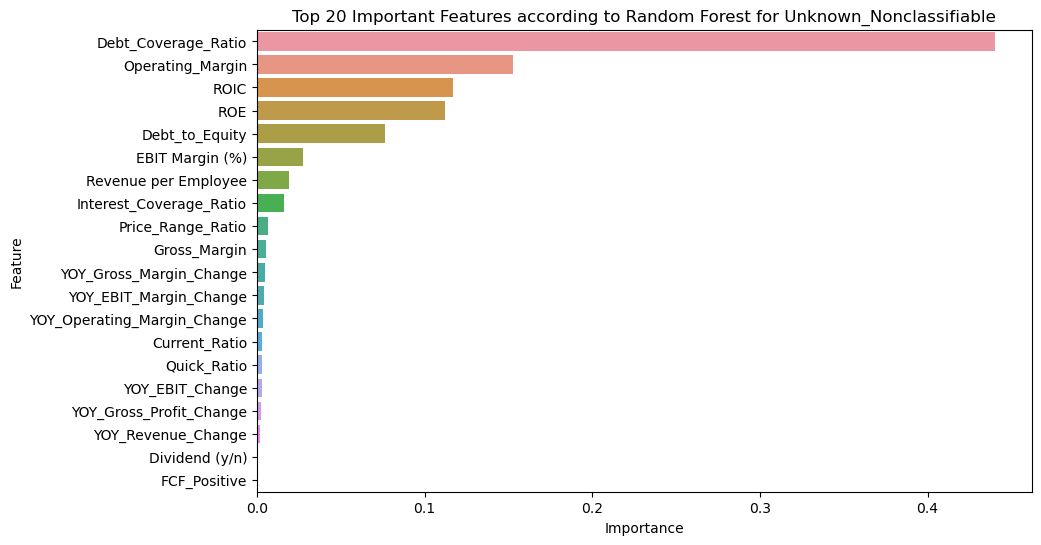


Division: Wholesale Trade


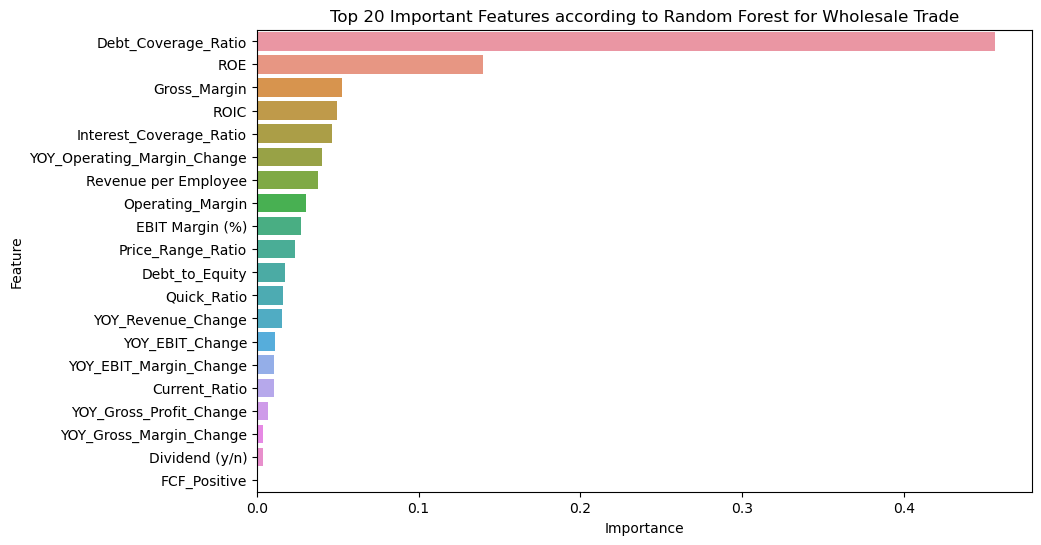

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'Division'
for division, group in selected_df.groupby('Division'):
    print(f"\nDivision: {division}")

    # Prepare the features (X) and target (y)
    X = group.drop(columns=['Ticker', 'Division', 'EV/EBITDA', 'P/E', 'EV/GP', 'EV_EBIT','EV/Sales', 'FCF Yield', 'EV/EBITDA-Capex'])
    y = group['EV/EBITDA']

    # Check if there are enough samples to train the model
    if len(y) < 10:
        print(f"Not enough samples to perform feature selection for {division}")
        continue

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Use RandomForestRegressor to get feature importances
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_scaled, y)
    feature_importances = rf.feature_importances_

    # Plot feature importances
    features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    features = features.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=features.head(20))
    plt.title(f'Top 20 Important Features according to Random Forest for {division}')
    plt.show()

In [20]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rf, n_features_to_select=10)
rfe.fit(X_scaled, y)

# Features selected by RFE
selected_features = X.columns[rfe.support_]
print("Features selected by RFE:", selected_features)

Features selected by RFE: Index(['ROE', 'ROIC', 'Debt_Coverage_Ratio', 'Interest_Coverage_Ratio',
       'Gross_Margin', 'Revenue per Employee', 'Operating_Margin',
       'EBIT Margin (%)', 'Price_Range_Ratio', 'YOY_Operating_Margin_Change'],
      dtype='object')


In [21]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Group the data by 'Division'
for division, group in selected_df.groupby('Division'):
    print(f"\nDivision: {division}")

    # Prepare the features (X) and target (y)
    X = group.drop(columns=['Ticker', 'Division', 'EV/EBITDA', 'P/E', 'EV/GP', 'EV_EBIT', 'EV/Sales', 'FCF Yield', 'EV/EBITDA-Capex'])
    y = group['EV/EBITDA']

    # Check if there are enough samples to train the model
    if len(y) < 10:
        print(f"Not enough samples to perform feature selection for {division}")
        continue

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize the RandomForestRegressor and RFE
    rf = RandomForestRegressor(random_state=42)
    rfe = RFE(estimator=rf, n_features_to_select=10)

    # Fit the RFE model
    rfe.fit(X_scaled, y)

    # Get the features selected by RFE
    selected_features = X.columns[rfe.support_]
    print("Features selected by RFE:", selected_features.tolist())


Division: Construction
Features selected by RFE: ['Debt_to_Equity', 'Debt_Coverage_Ratio', 'Current_Ratio', 'Quick_Ratio', 'Revenue per Employee', 'Operating_Margin', 'YOY_Gross_Margin_Change', 'Price_Range_Ratio', 'YOY_Operating_Margin_Change', 'YOY_EBIT_Change']

Division: Finance, Insurance and Real Estate
Features selected by RFE: ['Debt_to_Equity', 'ROE', 'ROIC', 'Debt_Coverage_Ratio', 'Current_Ratio', 'Interest_Coverage_Ratio', 'Revenue per Employee', 'Operating_Margin', 'EBIT Margin (%)', 'Price_Range_Ratio']

Division: Manufacturing
Features selected by RFE: ['Debt_to_Equity', 'ROE', 'Debt_Coverage_Ratio', 'Interest_Coverage_Ratio', 'Gross_Margin', 'Revenue per Employee', 'Operating_Margin', 'EBIT Margin (%)', 'YOY_Gross_Margin_Change', 'Price_Range_Ratio']

Division: Mining_Trans_Comm_Gas_Sanitary
Features selected by RFE: ['Debt_to_Equity', 'ROIC', 'Debt_Coverage_Ratio', 'Current_Ratio', 'Interest_Coverage_Ratio', 'Gross_Margin', 'Revenue per Employee', 'Operating_Margin', '

## EV/SALES

In [22]:
# Loop through each unique Division and compute feature importance
for division, group in selected_df.groupby('Division'):
    print(f"\nDivision: {division}")
    
    # Prepare features (X) and target (y)
    X = group.drop(columns=['Ticker', 'Division','EV/EBITDA', 'P/E', 'EV/GP','EV_EBIT','EV/Sales', 'FCF Yield','EV/EBITDA-Capex'])
    y = group['EV/Sales']

    # Check if there are enough samples to perform a split and modeling
    if len(y) < 10:
        print(f"Not enough samples to perform feature selection for {division}")
        continue
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Initialize the ExplainableBoostingRegressor
    ebm = ExplainableBoostingRegressor(random_state=42)

    # Fit the model
    ebm.fit(X_train, y_train)

    # Get the global feature importances from the model
    ebm_global = ebm.explain_global()
    show(ebm_global)


Division: Construction


<!-- http://127.0.0.1:7907/140363061386496/ -->


Division: Finance, Insurance and Real Estate


<!-- http://127.0.0.1:7907/140363047557392/ -->


Division: Manufacturing


<!-- http://127.0.0.1:7907/140363057936320/ -->


Division: Mining_Trans_Comm_Gas_Sanitary


<!-- http://127.0.0.1:7907/140363061327904/ -->


Division: Retail Trade


<!-- http://127.0.0.1:7907/140363074357664/ -->


Division: Services


<!-- http://127.0.0.1:7907/140363032386768/ -->


Division: Unknown_Nonclassifiable


<!-- http://127.0.0.1:7907/140363035379264/ -->


Division: Wholesale Trade


<!-- http://127.0.0.1:7907/140363035379600/ -->


Division: Construction


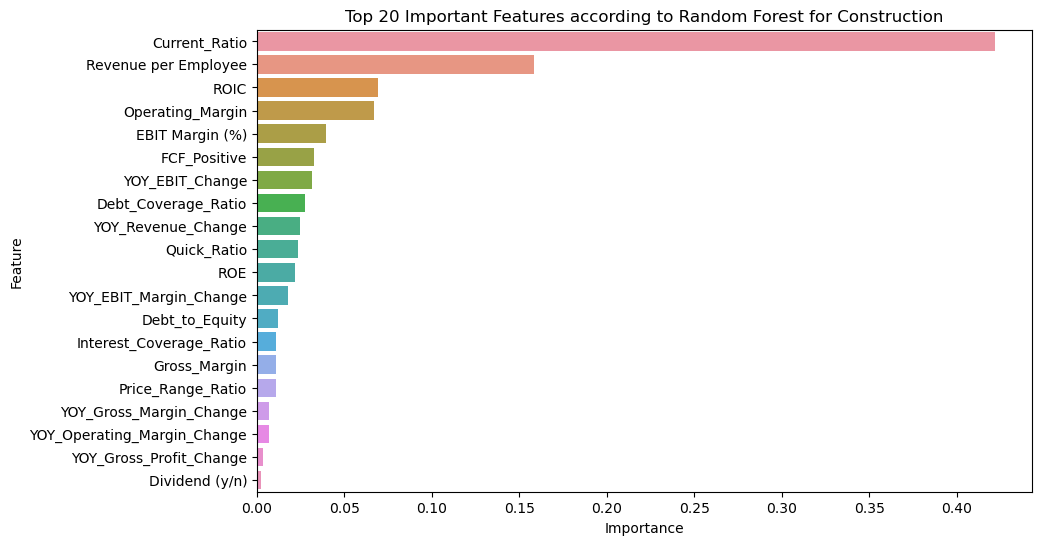


Division: Finance, Insurance and Real Estate


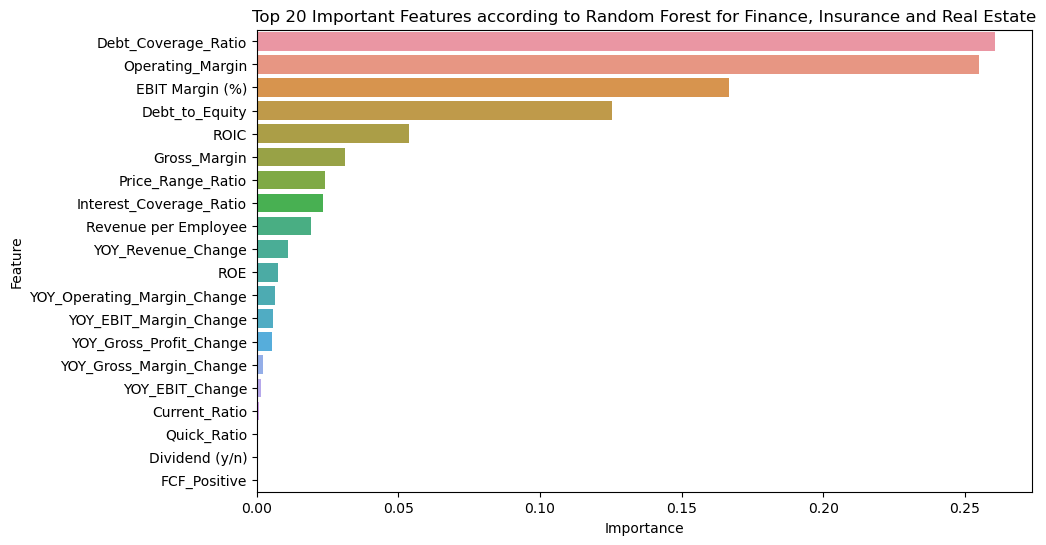


Division: Manufacturing


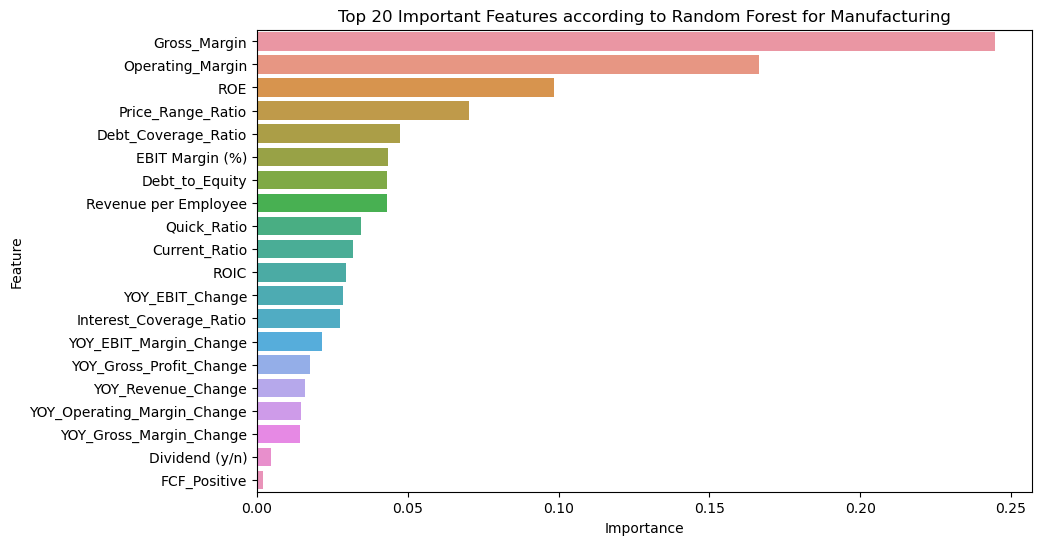


Division: Mining_Trans_Comm_Gas_Sanitary


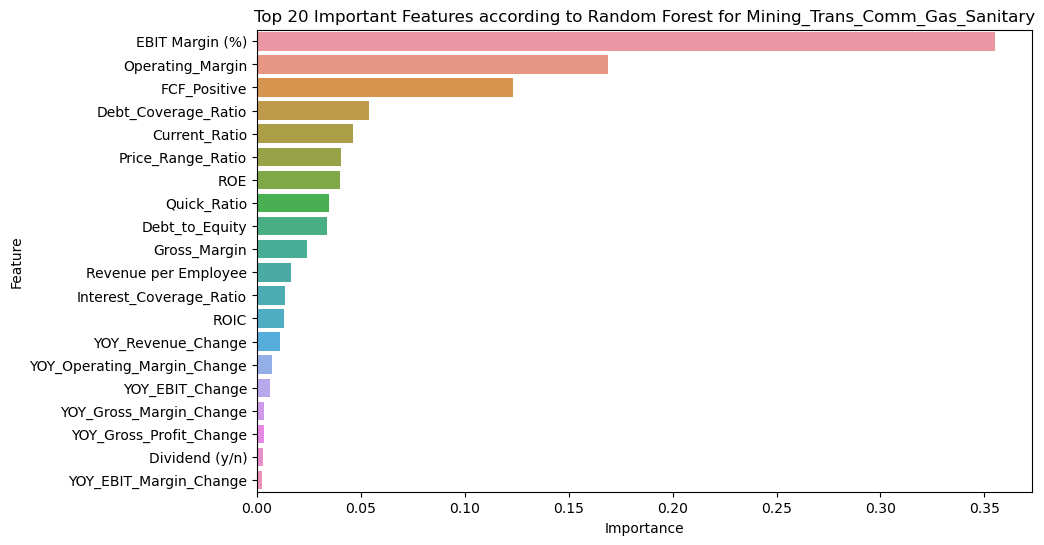


Division: Retail Trade


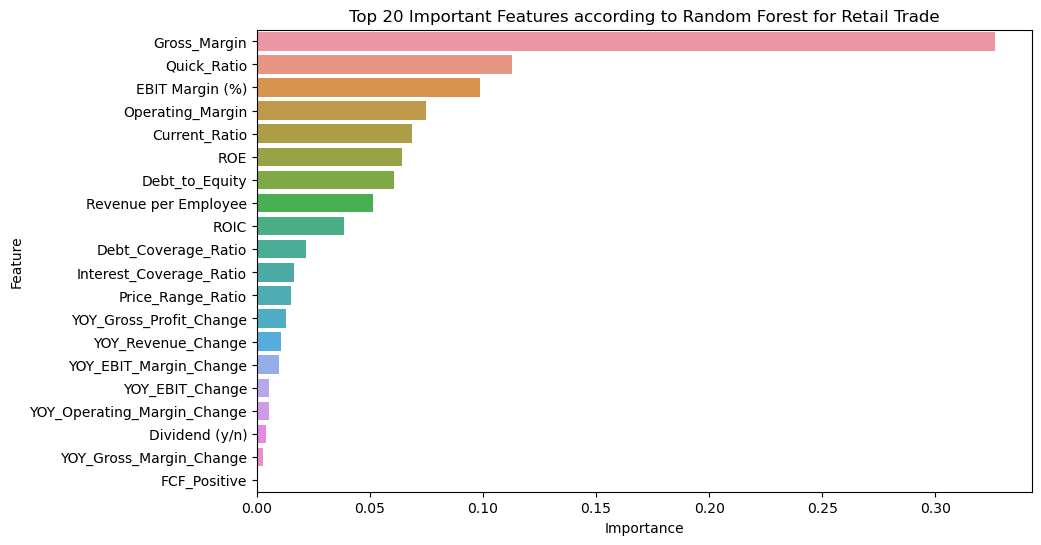


Division: Services


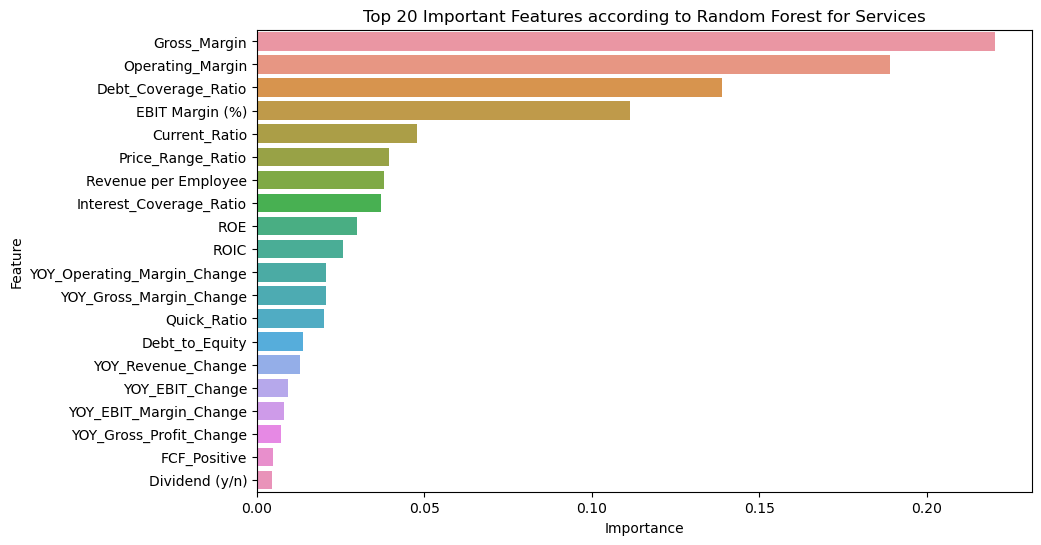


Division: Unknown_Nonclassifiable


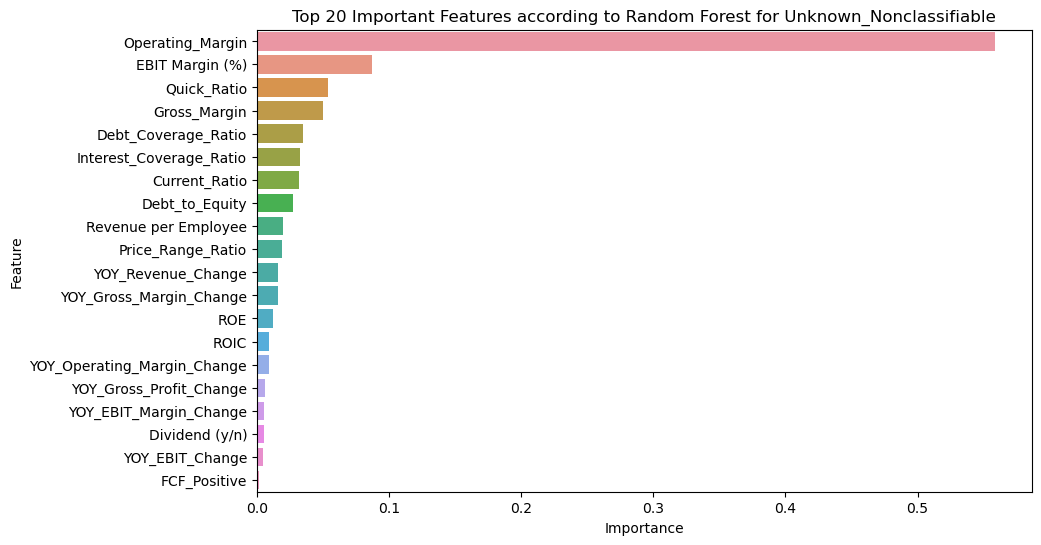


Division: Wholesale Trade


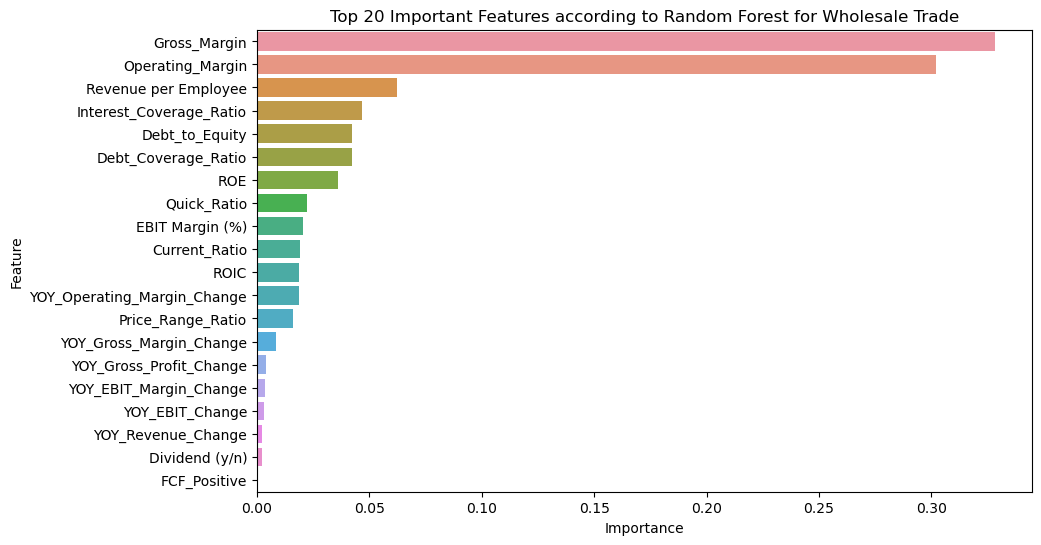

In [23]:
# Group the data by 'Division'
for division, group in selected_df.groupby('Division'):
    print(f"\nDivision: {division}")

    # Prepare the features (X) and target (y)
    X = group.drop(columns=['Ticker', 'Division', 'EV/EBITDA', 'P/E', 'EV/GP', 'EV_EBIT','EV/Sales', 'FCF Yield', 'EV/EBITDA-Capex'])
    y = group['EV/Sales']

    # Check if there are enough samples to train the model
    if len(y) < 10:
        print(f"Not enough samples to perform feature selection for {division}")
        continue

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Use RandomForestRegressor to get feature importances
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_scaled, y)
    feature_importances = rf.feature_importances_

    # Plot feature importances
    features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    features = features.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=features.head(20))
    plt.title(f'Top 20 Important Features according to Random Forest for {division}')
    plt.show()

In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Group the data by 'Division'
for division, group in selected_df.groupby('Division'):
    print(f"\nDivision: {division}")

    # Prepare the features (X) and target (y)
    X = group.drop(columns=['Ticker', 'Division', 'EV/EBITDA', 'EV/Sales','P/E', 'EV/GP', 'EV_EBIT', 'FCF Yield', 'EV/EBITDA-Capex'])
    y = group['EV/Sales']

    # Check if there are enough samples to train the model
    if len(y) < 10:
        print(f"Not enough samples to perform feature selection for {division}")
        continue

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize the RandomForestRegressor and RFE
    rf = RandomForestRegressor(random_state=42)
    rfe = RFE(estimator=rf, n_features_to_select=10)

    # Fit the RFE model
    rfe.fit(X_scaled, y)

    # Get the features selected by RFE
    selected_features = X.columns[rfe.support_]
    print("Features selected by RFE:", selected_features.tolist())


Division: Construction
Features selected by RFE: ['FCF_Positive', 'ROIC', 'Debt_Coverage_Ratio', 'Current_Ratio', 'Quick_Ratio', 'Revenue per Employee', 'Operating_Margin', 'EBIT Margin (%)', 'YOY_EBIT_Margin_Change', 'YOY_EBIT_Change']

Division: Finance, Insurance and Real Estate
Features selected by RFE: ['Debt_to_Equity', 'ROE', 'ROIC', 'Debt_Coverage_Ratio', 'Interest_Coverage_Ratio', 'Gross_Margin', 'Revenue per Employee', 'Operating_Margin', 'EBIT Margin (%)', 'Price_Range_Ratio']

Division: Manufacturing
Features selected by RFE: ['Debt_to_Equity', 'ROE', 'Debt_Coverage_Ratio', 'Quick_Ratio', 'Gross_Margin', 'Revenue per Employee', 'Operating_Margin', 'EBIT Margin (%)', 'Price_Range_Ratio', 'YOY_EBIT_Change']

Division: Mining_Trans_Comm_Gas_Sanitary
Features selected by RFE: ['Debt_to_Equity', 'ROE', 'FCF_Positive', 'Debt_Coverage_Ratio', 'Current_Ratio', 'Quick_Ratio', 'Gross_Margin', 'Operating_Margin', 'EBIT Margin (%)', 'Price_Range_Ratio']

Division: Retail Trade
Feature